## **Survey Analysis**
### Team Info
Connie Shiyu He

Liang Li

Yu-Chih (Wisdom) Chen

### Introduction

We are representing a consulting service firm in the home electronics product sector. We've sent out a survey and obtained findings from over 2,000 people about their usage, preferences for different embedded products and services. Thus, we want to utilize our survey results to help home electronics companies find their potential customers and possible channels to reach them. For further consulting services we will provide, we hope to give suggestions which are close to the customer and also better marketing strategies.


### Project Content

* [Data Import and Cleaning](#Data-Import-and-Cleaning)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Clustering Model](#Clustering-Model)
* [Results and Recommendations](#Results-and-Recommendations)

In [ ]:
# pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Install the Labraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import io
#from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings('ignore')

<a name ="Data-Import-and-Cleaning"></a>
## Data Import and Cleaning

1. [Data Import](#Data-Import)
2. [Data Cleaning](#Data-Cleaning)
  * [Missing Value](#Missing-Value)

<a name="Data-Import"></a>
### Data Import

In [ ]:
# This is for Google colab only
# uploaded = files.upload()

Saving DDS10_Data_Extract_with_labels.xlsx to DDS10_Data_Extract_with_labels.xlsx


In [ ]:
df = pd.read_excel('DDS10_Data_Extract_with_labels.xlsx', index_col=0)
# Dataset is now stored in a Pandas Dataframe

<a name="Data-Cleaning"></a>
### **Data Cleaning**

<a name="Missing-Value"></a>
#### Missing Value


In [ ]:
df_1 = df.drop(columns = ['Final Weighting'], axis = 1)
df_1.head(3)

,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,...,"Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest",Q89 - Which of the following is your most frequently used mechanism to get news?
record - Record number,,,,,,,,,,,,,,,,,,,,,
7,31,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,Yes,...,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Social media sites
4,30,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,Yes,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Disagree somewhat,Agree somewhat,Agree strongly,Social media sites
8,61,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,NaN,NaN,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Television news stations


In [ ]:
print("The shape of the data size", df_1.shape)

The shape of the data size (2205, 195)


In [ ]:
print("Display Missing values in the dataset: ")
print("\n")
print(df_1.isnull().sum())

Display Missing values in the dataset: 


Q1r1 - To begin, what is your age?                                                                                                                                                                                                                                  0
Q4 - What is your gender?                                                                                                                                                                                                                                           0
age - you are...                                                                                                                                                                                                                                                    0
Q2 - In which state do you currently reside?                                                                                                                                

In [ ]:
print("Display the percentage of missing values in each columns: ")
df_1.isnull().sum().sort_values(ascending = False)/len(df_1)

Display the percentage of missing values in each columns: 


Q11rNew3 - Drone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The first item     0.992744
Q11rNew2 - Virtual reality headset - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your sele                                                              0.989116
Q11r22 - Placeholder - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The first i    0.986848
Q11r18 - Smart watch - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by

In [ ]:
miss_value = df_1.isnull().sum(axis = 0)
miss_ratio = np.round(df_1.isnull().sum(axis = 0) / df_1.fillna(0).count(axis  = 0), 3)
miss_name = df_1.isnull().columns
miss_df = pd.DataFrame({'Missing Column': miss_name, 'Missing Values Count': miss_value, 'Missing Ratio': miss_ratio})
miss_df.sort_values(by = "Missing Ratio", ascending = False)

,Missing Column,Missing Values Count,Missing Ratio
"Q11rNew3 - Drone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The first item",Q11rNew3 - Drone - Of the products you indicat...,2189,0.993
"Q11rNew2 - Virtual reality headset - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your sele",Q11rNew2 - Virtual reality headset - Of the pr...,2181,0.989
"Q11r22 - Placeholder - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The first i",Q11r22 - Placeholder - Of the products you ind...,2176,0.987
"Q11r18 - Smart watch - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item i",Q11r18 - Smart watch - Of the products you ind...,2160,0.980
"Q11r4 - Portable streaming thumb drive/fob - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. M",Q11r4 - Portable streaming thumb drive/fob - O...,2158,0.979
...,...,...,...
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage",Q10 - Of those products you indicated you do n...,0,0.000
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player",Q10 - Of those products you indicated you do n...,0,0.000
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console",Q10 - Of those products you indicated you do n...,0,0.000
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player",Q10 - Of those products you indicated you do n...,0,0.000


**Only diplay the missing value is smaller and equal 70%**

In [ ]:
miss_fliter = miss_df[miss_df['Missing Ratio'] <= 0.7]

miss_fliter.sort_values(by = "Missing Ratio", ascending = False)

,Missing Column,Missing Values Count,Missing Ratio
"Q36r6 - Streaming video service - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with ""1"" being the most valued. Make your selec",Q36r6 - Streaming video service - Of the servi...,1533,0.695
"Q11r1 - Flat panel television - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. Th",Q11r1 - Flat panel television - Of the product...,1403,0.636
QNEW2 - How old are the children in your home?-Don't Know,QNEW2 - How old are the children in your home?...,1394,0.632
QNEW2 - How old are the children in your home?-5-9 years,QNEW2 - How old are the children in your home?...,1394,0.632
QNEW2 - How old are the children in your home?-26+ years,QNEW2 - How old are the children in your home?...,1394,0.632
...,...,...,...
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player",Q10 - Of those products you indicated you do n...,0,0.000
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console",Q10 - Of those products you indicated you do n...,0,0.000
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player",Q10 - Of those products you indicated you do n...,0,0.000
"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)",Q10 - Of those products you indicated you do n...,0,0.000


In [ ]:
df_2 = df_1.drop(df_1.columns[df_1.isnull().mean() >= 0.7], axis = 1)

In [ ]:
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

df_3 = imputer.fit_transform(df_2)

df_3 = pd.DataFrame(df_3, columns = df_2.columns)

df_3.head()

,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,...,"Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest",Q89 - Which of the following is your most frequently used mechanism to get news?
0,31,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,Yes,...,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Agree somewhat,Agree somewhat,Agree somewhat,Social media sites
1,30,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,Yes,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree somewhat,Disagree strongly,Disagree somewhat,Agree somewhat,Agree strongly,Social media sites
2,61,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,No,No,...,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Agree strongly,Agree strongly,Television news stations
3,68,Female,66 or older,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,No,No,...,Disagree strongly,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,N/A; I do not have a basis to answer,Disagree strongly,Disagree somewhat,Disagree strongly,Agree strongly,Agree somewhat,Television news stations
4,50,Female,47-65,Iowa,M

Check the missing value after the imputation

In [ ]:
print("Display the percentage of missing values in each columns: ")
df_3.isnull().sum().sort_values(ascending = False)/len(df_3)

Display the percentage of missing values in each columns: 


Q1r1 - To begin, what is your age?                                                                                                                                                                                                                                  0.0
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Mobile payment                                                                                                                                                                 0.0
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Tickets                                                                                                                                                                        0.0
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reservations                                                                                                               

<a name = "Exploratory-Data-Analysis"></a>
## Exploratory Data Analysis

0. [Basic Demographics](#Demographics)
1. [Child's Age in Home Information](#Child's-Age-in-Home-Information)
2. [Number of Potential Purchases Categories](#Number-of-Potential-Purchases-Categories)
3. [Owned Products Rating](#Owned-Products-Rating)
4. [Time spent on devices for movies](#Time-spent-on-devices-for-movies)
5. [Time spent on devices for sports](#Time-spent-on-devices-for-sports)
6. [Types of Apps to Use Frequently on Smartphone](#Types-of-Apps-to-Use-Frequently-on-Smartphone)
7. [Most Popular Entertainment Activities](#Most-Popular-Entertainment-Activities)
8. [Questions about Advertisements ](#Questions-about-advertisements)


In [ ]:
df_3.columns

Index(['Q1r1 - To begin, what is your age?', 'Q4 - What is your gender?',
       'age - you are...', 'Q2 - In which state do you currently reside?',
       'region - Region', 'QNEW3 - What is your employment status?',
       'Q5 - Which category best describes your ethnicity?',
       'QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?',
       'QNEW2 - How old are the children in your home?-0-4 years',
       'QNEW2 - How old are the children in your home?-5-9 years',
       ...
       'Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."',
       'Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following s

**The First 20 columns**

In [ ]:
df_3.iloc[:, :20]

,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,QNEW2 - How old are the children in your home?-10-13 years,QNEW2 - How old are the children in your home?-14-18 years,QNEW2 - How old are the children in your home?-19-25 years,QNEW2 - How old are the children in your home?-26+ years,QNEW2 - How old are the children in your home?-Don't Know,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob
0,31,Female,30-46,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,Yes,No,No,No,No,No,"$50,000 to $99,999",No,No,No,No
1,30,Female,30-46,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,Yes,No,No,No,No,No,"$30,000 to $49,999",Yes,Yes,No,No
2,61,Male,47-65,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No,No,"$100,000 to $299,999",Yes,Yes,No,No
3,68,Female,66 or older,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No,No,"$50,000 to $99,999",Yes,No,Yes,Yes
4,50,Female,47-65,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No,No,"$50,000 to $99,999",Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,68,Female,66 or older,Maryland,South,Retired,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No,No,Do not know,Yes,Yes,No,No
2201,67,Female,66 or older,Florida,South,Retired,East Asian or Southeast Asian,No,No,No,No,No,No,No,No,"$100,000 to $299,999",Yes,Yes,No,No
2202,69,Female,66 or older,Texas,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No,No,"Less than $29,999",No,No,No,Yes
2203,67,Female,66 or older,Florida,South,Retired,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No,No,"$50,000 to $99,999",Yes,No,No,No


<a name="Demographics"></a>
#### **Basic Demographics**

In [ ]:
df_3["Q1r1 - To begin, what is your age?"].quantile([.25, .5, .75])

0.25    25.0
0.50    37.0
0.75    59.0
Name: Q1r1 - To begin, what is your age?, dtype: object

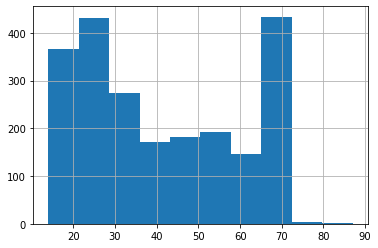

In [ ]:
df_3["Q1r1 - To begin, what is your age?"].hist()

There are more points aggregated at lower and higher ages, indicating the results of the survey could be more separated, due to stronger and different opinions from younger and older generations.

In [ ]:
df_3["Q4 - What is your gender?"].value_counts()

Female    1104
Male      1101
Name: Q4 - What is your gender?, dtype: int64

Males and females are pretty balanced.

In [ ]:
df_3["Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential."].value_counts()

$50,000 to $99,999      755
Less than $29,999       488
$30,000 to $49,999      441
$100,000 to $299,999    328
Do not know             170
More than $300,000       23
Name: Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential., dtype: int64

About half surveyed people indicated annual pre-tax income is above $50,000. 

In [ ]:
df_3["region - Region"].value_counts()

South        775
West         521
Midwest      468
Northeast    441
Name: region - Region, dtype: int64

There are more people from the south part, which indicates that the results could be more influenced by the envrionmental, trend and economic backgrounds of the southern region.

In [ ]:
df_3["QNEW3 - What is your employment status?"].value_counts()

Employed full-time or part-time    916
Retired                            439
Student                            362
Unemployed                         329
Self-employed                      159
Name: QNEW3 - What is your employment status?, dtype: int64

There are about half of people are either employed (full time/part time/self-employed), and other half are not.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

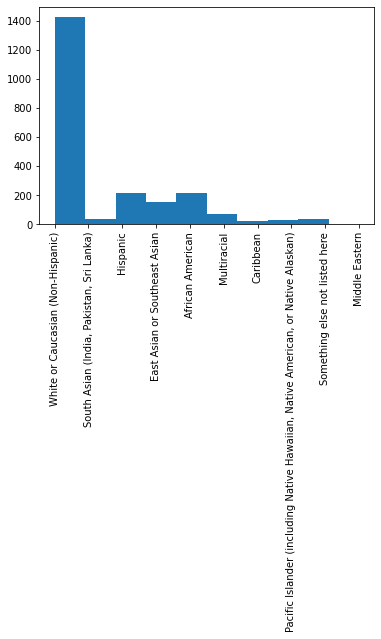

In [ ]:
p5_plot = plt.hist(df_3["Q5 - Which category best describes your ethnicity?"])
plt.xticks(rotation='vertical')

Over half of the surveyed people's ethnicity are White or Caucasian. Asian, Black and other ethnicities are underrepresented here.

<a name="Child's-Age-in-Home-Information"></a>
#### **QNEW 2: Child's Age in Home Information**

In [ ]:
child_info_df = df_3[['Q1r1 - To begin, what is your age?', 'Q4 - What is your gender?',
               'Q2 - In which state do you currently reside?', 'region - Region', 
               'QNEW3 - What is your employment status?', 'Q5 - Which category best describes your ethnicity?', 
               'QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?', 
               'QNEW2 - How old are the children in your home?-0-4 years', 
               'QNEW2 - How old are the children in your home?-5-9 years', 
               'QNEW2 - How old are the children in your home?-10-13 years', 
                'QNEW2 - How old are the children in your home?-14-18 years', 
               'QNEW2 - How old are the children in your home?-19-25 years', 
                'QNEW2 - How old are the children in your home?-26+ years'
              ]]

child_info_df.head()

,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,QNEW2 - How old are the children in your home?-10-13 years,QNEW2 - How old are the children in your home?-14-18 years,QNEW2 - How old are the children in your home?-19-25 years,QNEW2 - How old are the children in your home?-26+ years
0,31,Female,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),Yes,No,Yes,No,No,No,No
1,30,Female,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),Yes,Yes,Yes,No,No,No,No
2,61,Male,Alabama,South,Retired,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No
3,68,Female,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No
4,50,Female,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),No,No,No,No,No,No,No


In [ ]:
yes_no = {
    "Yes": True,
    "No": False
}

child_info_df['QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?'] = child_info_df['QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?'].map(yes_no)
child_info_df['QNEW2 - How old are the children in your home?-0-4 years'] = child_info_df['QNEW2 - How old are the children in your home?-0-4 years'].map(yes_no)
child_info_df['QNEW2 - How old are the children in your home?-5-9 years'] = child_info_df['QNEW2 - How old are the children in your home?-5-9 years'].map(yes_no)
child_info_df['QNEW2 - How old are the children in your home?-10-13 years'] = child_info_df['QNEW2 - How old are the children in your home?-10-13 years'].map(yes_no)
child_info_df['QNEW2 - How old are the children in your home?-14-18 years'] = child_info_df['QNEW2 - How old are the children in your home?-14-18 years'].map(yes_no)
child_info_df['QNEW2 - How old are the children in your home?-19-25 years'] = child_info_df['QNEW2 - How old are the children in your home?-19-25 years'].map(yes_no)
child_info_df['QNEW2 - How old are the children in your home?-26+ years'] = child_info_df['QNEW2 - How old are the children in your home?-26+ years'].map(yes_no)


In [ ]:
child_columns = ['Age', 'Gender', 'Reside', 'Region', 'Emp_Status', 'Ethnicity', 'Has Child or Not', 
                'child_0-4', 'child_5-9', 'child_10-13', 'child_14-18', 'child_19-25', 'child_26+']

child_info_df.columns = child_columns

child_info_df.head()

,Age,Gender,Reside,Region,Emp_Status,Ethnicity,Has Child or Not,child_0-4,child_5-9,child_10-13,child_14-18,child_19-25,child_26+
0,31,Female,Illinois,Midwest,Unemployed,White or Caucasian (Non-Hispanic),True,False,True,False,False,False,False
1,30,Female,Arkansas,South,Unemployed,White or Caucasian (Non-Hispanic),True,True,True,False,False,False,False
2,61,Male,Alabama,South,Retired,White or Caucasian (Non-Hispanic),False,False,False,False,False,False,False
3,68,Female,New York,Northeast,Retired,White or Caucasian (Non-Hispanic),False,False,False,False,False,False,False
4,50,Female,Iowa,Midwest,Employed full-time or part-time,White or Caucasian (Non-Hispanic),False,False,False,False,False,False,False


In [ ]:
count_child_age = child_info_df.iloc[:,6:].apply(pd.value_counts)

count_child_age

,Has Child or Not,child_0-4,child_5-9,child_10-13,child_14-18,child_19-25,child_26+
False,1394,1957,1920,1904,1900,2146,2175
True,811,248,285,301,305,59,30


In [ ]:
total_child_age = child_info_df.iloc[:,6:].apply(lambda x: x.count())

total_child_age

Has Child or Not    2205
child_0-4           2205
child_5-9           2205
child_10-13         2205
child_14-18         2205
child_19-25         2205
child_26+           2205
dtype: int64

In [ ]:
percent_child_age = count_child_age / total_child_age

Text(0.5, 1.0, "Child's Age at Home")

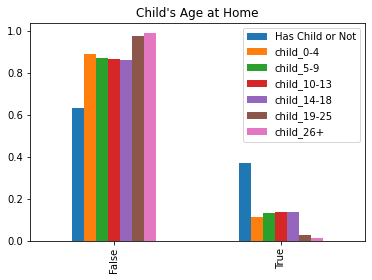

In [ ]:
plt.rcParams["figure.figsize"] = [6,4]

ax = percent_child_age.plot(kind = 'bar')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

plt.title("Child's Age at Home")

We can see that most families do not have children while those families who have children age is between 0 and 18. Moreover, those above 19 children, they are not willing to live at home.

<a name="Number-of-Potential-Purchases-Categories"></a>
#### **Q10: Number of Potential Purchases Categories**

In [ ]:
valid_col_names_10 = [x for x in df_3.columns if 'Q10' in x]

In [ ]:
Q10_purchase_plan = [x.split('-')[2:] for x in valid_col_names_10]

In [ ]:
Q10_purchase_plan_options = [' '.join([row for row in x]) for x in Q10_purchase_plan]

In [ ]:
purchase_plan_dict = dict(zip(valid_col_names_10,Q10_purchase_plan_options))

In [ ]:
df_Q10 = df_3[valid_col_names_10]

In [ ]:
Q10_count_dict = {}
for col in df_Q10.columns:
    count_sum = (df_Q10[col] == 'Yes').sum()
    # find the purchase plan category from orig column
    Q10_count_dict[purchase_plan_dict[col]] =  count_sum

In [ ]:
Q10_count_df = pd.DataFrame.from_dict(Q10_count_dict, orient='index')

In [ ]:
Q10_count_df.columns = ['Counts']

In [ ]:
Q10_count_df.sort_values(by=Q10_count_df.columns[0],ascending=False)

,Counts
None of the above,895
Smart watch,298
Fitness band,285
Tablet,224
Streaming media box or over the top box,184
Virtual reality headset,165
Drone,161
Dedicated e book reader,159
Portable streaming thumb drive/fob,158
Flat panel television,157


In [ ]:
# remove None of above
Q10_count_df = Q10_count_df.drop(index='None of the above')

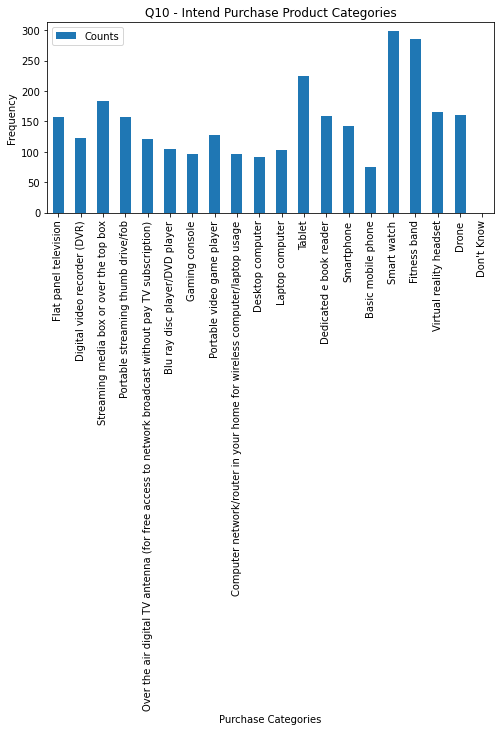

In [ ]:
plt.rcParams["figure.figsize"] = [8, 3.50]
plt.rcParams["figure.autolayout"] = True
Q10_count_df.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Purchase Categories')
plt.title('Q10 - Intend Purchase Product Categories')
#plt.xticks(rotation=45) # might mess up with visual if adjust angle
plt.show()

We chose to explore on this question "Q10: Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months? [only serve up those products that consumers indicated they do not own in Q8]", because this question let us directly see potential customers for specific products.

Overall, for people who have actually chosen a product, Smart watch, fitnessband, tablet got most votes. Basic mobile phone, Desktop computer, routers got least votes. The potential reasons could be: 1. Due to technical development, home electronics have evolved into helping people live a more intelligent and entertaining life. There is a trend showing that these intelligent and technical devices are more favored; 2. Products have different lifetime. For example, desktop computers, routers can last for more years, so the frequency of repurchasing them is fairly low. 

<a name="Owned-Products-Rating"></a>
#### **Q11: Owned Products Ratings**

In [ ]:
valid_col_names_11 = [x for x in df_3.columns if 'Q11' in x]

In [ ]:
Q11_products = [x.split('-')[1].strip() for x in valid_col_names_11]

In [ ]:
df_Q11 = df_3[valid_col_names_11]

In [ ]:
df_Q11.set_axis(Q11_products, axis=1,inplace=True)

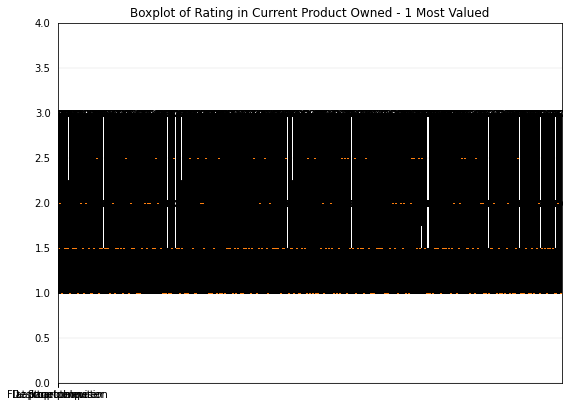

In [ ]:
fig = plt.figure(figsize =(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Boxplot of Rating in Current Product Owned - 1 Most Valued')
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
bp = ax.boxplot(df_Q11)
plt.xticks([1,2,3,4],[df_Q11.columns[0],df_Q11.columns[1],df_Q11.columns[2],df_Q11.columns[3]])
plt.ylim(0, 4)
#ax.set_yticks(np.arange(0, 4, 0.25))
plt.show()

People tend to value their flat panel television, desktop computer comparing to laptop computer and smartphone. This finding indicates that the repurchsing rate of flat panel television and desktop computer will be lower. So the promotion for these 2 products should be carefully targeted, focused on its quality and durability.

<a name="Time-spent-on-devices-for-movies"></a>
#### **Q15: Of the time you spend watching movies, what percentage of time do you watch on the following devices? [only shows rows for devices owned Q8]**

In [ ]:
Q15_cols_orig = [x for x in df.columns if x[:3] == 'Q15']
Q15_cols = [x.split('-')[1] for x in Q15_cols_orig]
Q15_cols

[' Smartphone ', ' Tablet ', ' Laptop/Desktop ', ' Television ']

In [ ]:
df_15 = df_3[Q15_cols_orig]
df_15.columns = Q15_cols
df_15

,Smartphone,Tablet,Laptop/Desktop,Television
0,25,25,50,0
1,0,0,15,85
2,0,0,0,100
3,0,10,0,90
4,0,0,0,100
...,...,...,...,...
2200,0,0,0,100
2201,0,0,0,100
2202,0,0,100,0
2203,0,0,0,100


In [ ]:
df_15.describe().transpose()
# shows "-1", which is useless value.

,count,unique,top,freq
Smartphone,2205,37,0,1361
Tablet,2205,34,0,1390
Laptop/Desktop,2205,47,0,693
Television,2205,39,0,632


In [ ]:
# remove observations with negative values (found that -1 occurred with each element for observation if there is any)
df_15 = df_15.drop(df_15.index[df_15[' Smartphone ']<0].tolist())

In [ ]:
df_15

,Smartphone,Tablet,Laptop/Desktop,Television
0,25,25,50,0
1,0,0,15,85
2,0,0,0,100
3,0,10,0,90
4,0,0,0,100
...,...,...,...,...
2200,0,0,0,100
2201,0,0,0,100
2202,0,0,100,0
2203,0,0,0,100


In [ ]:
df_15.describe().transpose()

,count,unique,top,freq
Smartphone,1991,36,0,1361
Tablet,1991,33,0,1390
Laptop/Desktop,1991,46,0,693
Television,1991,38,0,632


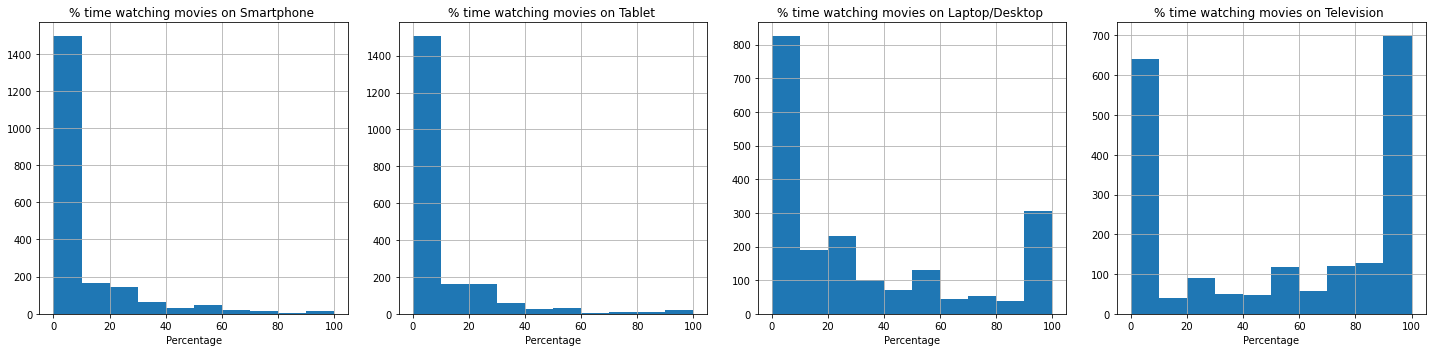

In [ ]:
fig = plt.figure(figsize=(20, 5))
for i in range(0,len(df_15.columns)):
    ax = fig.add_subplot(1, 4, i+1)
    ax.set_xlabel("Percentage")
    data = df_15.iloc[:,i]
    data.hist()
    plt.title("% time watching movies on" +df_15.columns[i])
plt.show()

While watching movies, most people tend to watch them on Television and Laptop/Desktop. While promoting ads on movies platform, these 2 channels should be emphasized more and watch for conversion rate.

<a name="Time-spent-on-devices-for-sports"></a>
#### **Q16: Of the time you spend watching sports, what percentage of time do you watch on the following devices? [only shows rows for devices owned Q8]**

In [ ]:
Q16_cols_orig = [x for x in df.columns if x[:3] == 'Q16']
Q16_cols = [x.split('-')[1] for x in Q16_cols_orig]
df_16 = df_3[Q16_cols_orig]
df_16.columns = Q16_cols
df_16
# see some negative values, which does not make sense for percentages

,Smartphone,Tablet,Laptop/Desktop,Television
0,25,25,50,0
1,-1,-1,-1,-1
2,-1,-1,-1,-1
3,-1,-1,-1,-1
4,-1,-1,-1,-1
...,...,...,...,...
2200,0,0,0,100
2201,0,0,0,100
2202,-1,-1,-1,-1
2203,-1,-1,-1,-1


In [ ]:
# remove observations with negative values
df_16 = df_16.drop(df_16.index[df_16[' Smartphone ']<0].tolist())

In [ ]:
df_16.describe().transpose()

,count,unique,top,freq
Smartphone,1472,32,0,1040
Tablet,1472,31,0,1110
Laptop/Desktop,1472,36,0,746
Television,1472,32,100,578


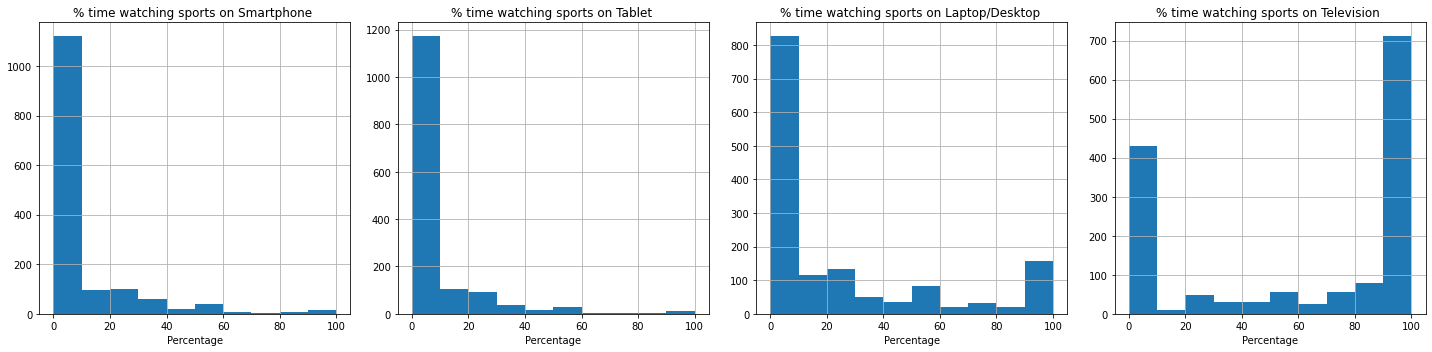

In [ ]:
fig = plt.figure(figsize=(20, 5))
for i in range(0,len(df_16.columns)):
    ax = fig.add_subplot(1, 4, i+1)
    ax.set_xlabel("Percentage")
    data = df_16.iloc[:,i]
    data.hist()
    plt.title("% time watching sports on" +df_16.columns[i])
plt.show()

While watching sports, most people tend to watch them on Television, which outweighs other channels. While promoting ads on sports platform, Television should be emphasized more and watch for conversion rate.

<a name="Time-spent-on-devices-for-TV-shows"></a>
#### **Q17: Of the time you spend watching TV shows, what percentage of time do you watch on the following devices? [only shows rows for devices owned Q8]**

In [ ]:
Q17_cols_orig = [x for x in df.columns if x[:3] == 'Q17']
Q17_cols = [x.split('-')[1] for x in Q17_cols_orig]
df_17 = df_3[Q17_cols_orig]
df_17.columns = Q17_cols
df_17
# saw negative values

,Smartphone,Tablet,Laptop/Desktop,Television
0,25,25,50,0
1,0,0,5,95
2,0,0,0,100
3,0,10,0,90
4,0,0,0,100
...,...,...,...,...
2200,0,0,0,100
2201,0,0,0,100
2202,0,0,100,0
2203,0,0,0,100


In [ ]:
df_17 = df_17.drop(df_17.index[df_17[' Smartphone ']<0].tolist())

In [ ]:
df_17.describe().transpose()

,count,unique,top,freq
Smartphone,1979,36,0,1417
Tablet,1979,35,0,1436
Laptop/Desktop,1979,41,0,782
Television,1979,35,0,624


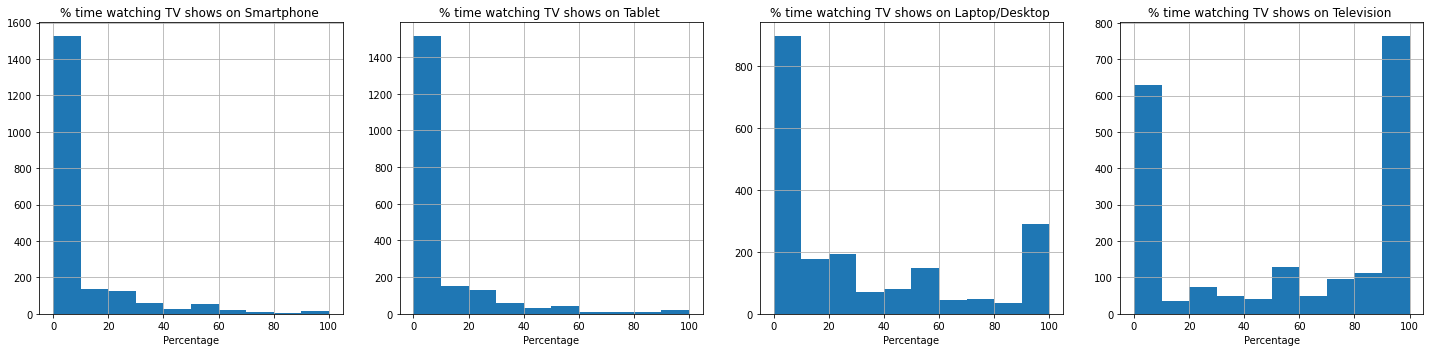

In [ ]:
fig = plt.figure(figsize=(20, 5))
for i in range(0,len(df_17.columns)):
    ax = fig.add_subplot(1, 4, i+1)
    ax.set_xlabel("Percentage")
    data = df_17.iloc[:,i]
    data.hist()
    plt.title("% time watching TV shows on" +df_17.columns[i])
plt.show()

While watching TV shows, most people tend to watch them on Television, which outweighs other channels. While promoting ads on sports platform, Television should be emphasized more and watch for conversion rate.

Overall, Television is the most favored channel for watching movies, sports and TV shows, this traditional channel should be focused more while promoting through these media platforms.

<a name="Types-of-Apps-to-Use-Frequently-on-Smartphone"></a>
#### **Q22: Types of Apps to Use Frequently on Smartphone**

In [ ]:
valid_col_names_22 = [x for x in df_3.columns if 'Q22' in x]

In [ ]:
Q22_apps = [x.split('-')[2].strip() for x in valid_col_names_22]

In [ ]:
app_usage_dict = dict(zip(valid_col_names_22, Q22_apps))

In [ ]:
df_Q22 = df_3[valid_col_names_22]

In [ ]:
Q22_count_dict = {}
for col in df_Q22.columns:
    count_sum = (df_Q22[col] == 'Yes').sum()
    # find the category from orig column
    Q22_count_dict[app_usage_dict[col]] =  count_sum

In [ ]:
Q22_count_dict.pop('I do not use any of the above types of apps on a frequent (everyday/weekly) basis.')

157

In [ ]:
Q22_count_df = pd.DataFrame.from_dict(Q22_count_dict, orient='index')

In [ ]:
Q22_count_df.columns = ['Counts']

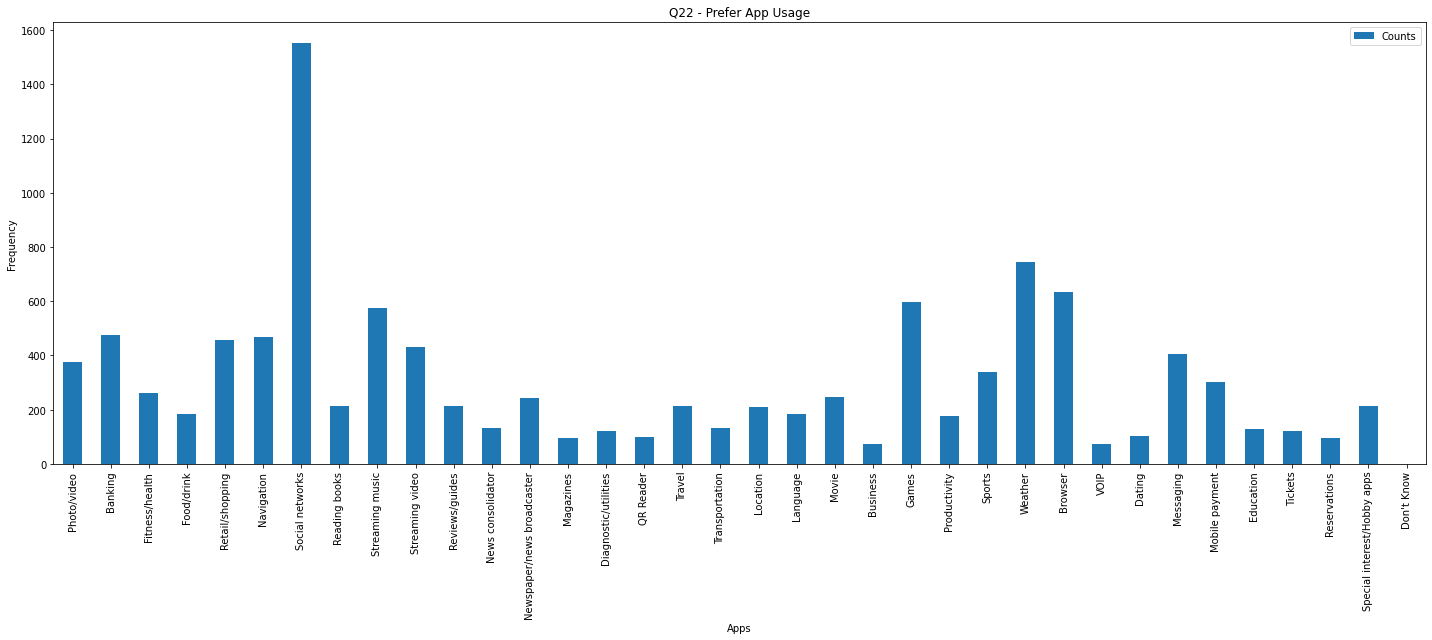

In [ ]:
plt.rcParams["figure.figsize"] = [8, 3.50]
plt.rcParams["figure.autolayout"] = True
Q22_count_df.plot(kind='bar',figsize = (20,9))
plt.ylabel('Frequency')
plt.xlabel('Apps')
plt.title('Q22 - Prefer App Usage')
#plt.xticks(rotation=45)
plt.show()

Q22 :Check age group and their favorite apps to use

In [ ]:
valid_col_names_22.append('age - you are...')
valid_col_names_22.append('Q4 - What is your gender?')
valid_col_names_22.append('QNEW3 - What is your employment status?')


In [ ]:
valid_col_names_22.append('Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.')

In [ ]:
df_combine = df_3[valid_col_names_22]

In [ ]:
df_combine['age - you are...'].value_counts()

14-23          443
30-46          441
47-65          441
24-29          441
66 or older    439
Name: age - you are..., dtype: int64

In [ ]:
Q22_apps.append('AgeGroup')
Q22_apps.append('Gender')
Q22_apps.append('Employment')

In [ ]:
Q22_apps.append('Income')

In [ ]:
df_combine.set_axis(Q22_apps, axis=1,inplace=True)

In [ ]:
for col in df_combine.columns[:-4]:
    df_combine[col] = df_combine[col].map({'Yes': 1, 'No': 0})

In [ ]:
df_combine

,Photo/video,Banking,Fitness/health,Food/drink,Retail/shopping,Navigation,Social networks,Reading books,Streaming music,Streaming video,...,Education,Tickets,Reservations,Special interest/Hobby apps,I do not use any of the above types of apps on a frequent (everyday/weekly) basis.,Don't Know,AgeGroup,Gender,Employment,Income
0,0,1,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,30-46,Female,Unemployed,"$50,000 to $99,999"
1,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,30-46,Female,Unemployed,"$30,000 to $49,999"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,47-65,Male,Retired,"$100,000 to $299,999"
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,66 or older,Female,Retired,"$50,000 to $99,999"
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,47-65,Female,Employed full-time or part-time,"$50,000 to $99,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,66 or older,Female,Retired,Do not know
2201,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,66 or older,Female,Retired,"$100,000 to $299,999"
2202,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,66 or older,Female,Employed full-time or part-time,"Less than $29,999"
2203,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,66 or older,Female,Retired,"$50,000 to $99,999"


In [ ]:
tmp = df_combine.groupby(by = 'AgeGroup').sum().reset_index()

In [ ]:
# tmp.iloc[:, 1:].idxmax(axis=1)
def getTopFive(row, columns):
    x = list(row.values)
    return columns[np.argsort(x)[-1:-6:-1]]
tmp["Top Five Apps"] = tmp.iloc[:, 1:].apply(lambda row: getTopFive(row, tmp.columns[1:]), axis=1)

In [ ]:
tmp

,AgeGroup,Photo/video,Banking,Fitness/health,Food/drink,Retail/shopping,Navigation,Social networks,Reading books,Streaming music,...,Dating,Messaging,Mobile payment,Education,Tickets,Reservations,Special interest/Hobby apps,I do not use any of the above types of apps on a frequent (everyday/weekly) basis.,Don't Know,Top Five Apps
0,14-23,123,67,56,45,121,93,322,47,188,...,34,132,62,45,25,11,65,32,0,"Index(['Social networks', 'Streaming music', '..."
1,24-29,93,123,89,67,109,109,322,59,162,...,29,116,96,34,45,25,69,12,0,"Index(['Social networks', 'Weather', 'Streamin..."
2,30-46,84,153,67,49,120,113,319,61,117,...,35,104,83,33,32,31,56,16,0,"Index(['Social networks', 'Weather', 'Browser'..."
3,47-65,38,77,37,14,72,77,295,24,80,...,4,34,40,9,13,15,16,41,0,"Index(['Social networks', 'Weather', 'Browser'..."
4,66 or older,37,57,13,8,36,77,293,24,28,...,2,20,21,6,5,13,8,56,0,"Index(['Social networks', 'Weather', 'Navigati..."


In [ ]:
tmp[["Top Five Apps"]]

,Top Five Apps
0,"Index(['Social networks', 'Streaming music', '..."
1,"Index(['Social networks', 'Weather', 'Streamin..."
2,"Index(['Social networks', 'Weather', 'Browser'..."
3,"Index(['Social networks', 'Weather', 'Browser'..."
4,"Index(['Social networks', 'Weather', 'Navigati..."


All age groups rated social networks app for their favorite app to use. Other than that, weather, streaming music, browser occurred and rated high for various groups. Games only appeared in top 5 for people below age 47, and Banking only appeared for people above 30. Navigation only appeared for people above 66.

<a name="Most-Popular-Entertainment-Activities"></a>
#### **Q37: Most Popular Entertainment Activities**

In [ ]:
valid_col_names_37 = [x for x in df_1.columns if 'Q37' in x]

valid_col_names_37

['Q37r1 - Attending live performances (sporting events, concerts, or stage (musical, dramatic, or other)) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ',
 'Q37r2 - Going to the movies - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€\x9d being the most preferred. Make your selections by clicking each item in',
 'Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€\x9d being the most preferred. Make your selec',
 'Q37r4 - Listening to music (using any device) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€\x9d bei

In [ ]:
value_col_df_37 = df_1.loc[:, df_1.columns.isin(valid_col_names_37)]
print("Display all the Q37 columns in the dataset: ")
value_col_df_37.head()

Display all the Q37 columns in the dataset: 


,"Q37r1 - Attending live performances (sporting events, concerts, or stage (musical, dramatic, or other)) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ","Q37r2 - Going to the movies - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selections by clicking each item in","Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec","Q37r4 - Listening to music (using any device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selections by cli","Q37r5 - Reading books (either physical books or via an e-book reader and/or online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most","Q37r6 - Reading magazines (either printed or online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selections","Q37r7 - Reading newspapers (either printed or online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selection","Q37r8 - Listening to the radio (any format and/or device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec","Q37r9 - Playing video games (handhelds, PC, console, mobile/cellular/smartphone, online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the","Q37r10 - Using the Internet for social or personal interests - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your se"
record - Record number,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,1.0
8,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0
3,NaN,NaN,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
15,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0


In [ ]:
df_37 = value_col_df_37.dropna(thresh=2)

df_37

,"Q37r1 - Attending live performances (sporting events, concerts, or stage (musical, dramatic, or other)) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ","Q37r2 - Going to the movies - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selections by clicking each item in","Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec","Q37r4 - Listening to music (using any device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selections by cli","Q37r5 - Reading books (either physical books or via an e-book reader and/or online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most","Q37r6 - Reading magazines (either printed or online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selections","Q37r7 - Reading newspapers (either printed or online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selection","Q37r8 - Listening to the radio (any format and/or device) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec","Q37r9 - Playing video games (handhelds, PC, console, mobile/cellular/smartphone, online) - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the","Q37r10 - Using the Internet for social or personal interests - For the following types of entertainment activities, please rank your top three, with ""1"" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your se"
record - Record number,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,1.0
8,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0
3,NaN,NaN,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
15,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
13011,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
13018,3.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
13019,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0


In [ ]:
Q37_col_names = ['Attending live performances', 'Going to the movies', 'Watching television', 
                'Listening to music', 'Reading books', 'Reading magazines', 'Reading newspapers', 
               'Listening to the radio', 'Playing video games', 'Using the Internet for social or personal interests']

df_37.columns = Q37_col_names

df_37.head()

,Attending live performances,Going to the movies,Watching television,Listening to music,Reading books,Reading magazines,Reading newspapers,Listening to the radio,Playing video games,Using the Internet for social or personal interests
record - Record number,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,1.0
8,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0
3,NaN,NaN,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
15,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0


In [ ]:
df_37_counts = df_37.apply(pd.value_counts)
df_37_counts

,Attending live performances,Going to the movies,Watching television,Listening to music,Reading books,Reading magazines,Reading newspapers,Listening to the radio,Playing video games,Using the Internet for social or personal interests
1.0,146,195,564,197,194,30,84,67,206,522
2.0,113,181,463,307,211,80,121,109,199,421
3.0,141,222,309,339,217,132,131,169,219,326


Text(0, 0.5, 'Count')

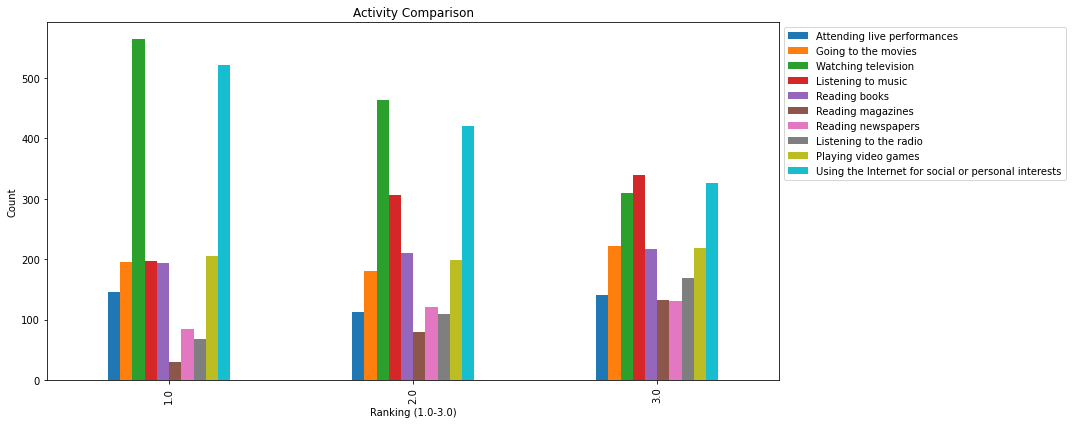

In [ ]:
plt.rcParams["figure.figsize"] = [15, 6]
ax = df_37_counts.plot(kind = 'bar')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

plt.title("Activity Comparison")
plt.xlabel("Ranking (1.0-3.0)")
plt.ylabel("Count")

We can see that watching television and using the Internet for social or personal interests are mostly rated as 1st choice of entertainment activities. 
While reading magazines, newspapers, listening to the radio are mostly disliked. 


<a name="Questions-about-advertisements"></a>
#### **Q39: Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."**

In [ ]:
Q39_cols_orig = [x for x in df.columns if x[:3] == 'Q39']
df_39 = df_3[Q39_cols_orig]
df_39.columns = ['Pay for news to eliminate ads', 'Pay for sports info to eliminate ads', 'Pay for games to eliminate ads', 'Pay for music to eliminate ads', 'Pay for TV shows to eliminate ads', 'Pay for movies to eliminate ads', 'Provide personal information for targeted ads', 'Worried about online personal info leakage', 'Willing to view ads for subscription discount']
levels = ['Agree strongly', 'Agree somewhat', 'Disagree somewhat', 'Disagree strongly', 'N/A; I do not have a basis to answer']

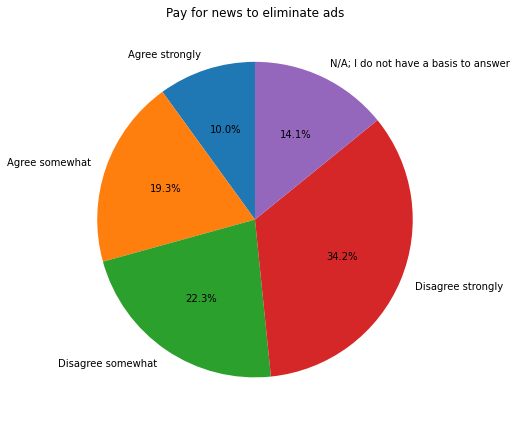

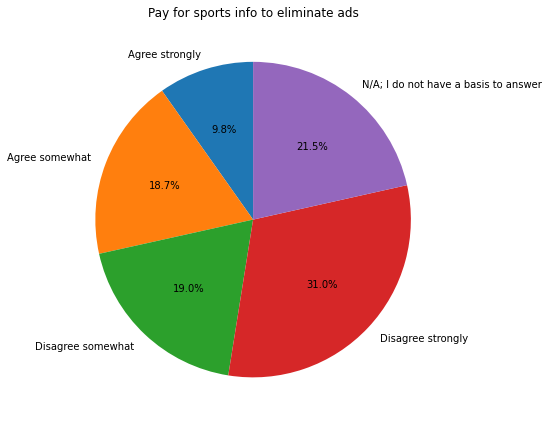

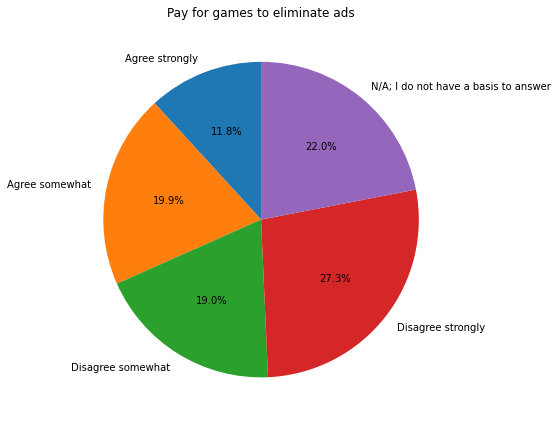

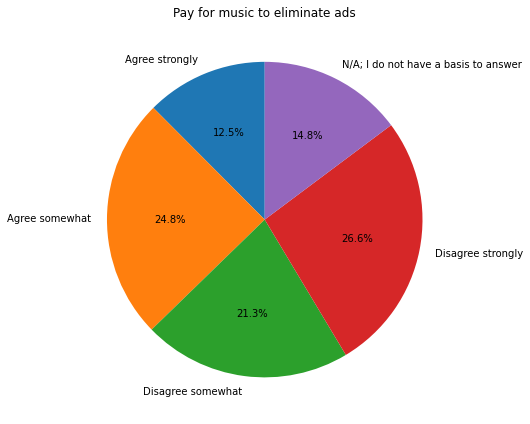

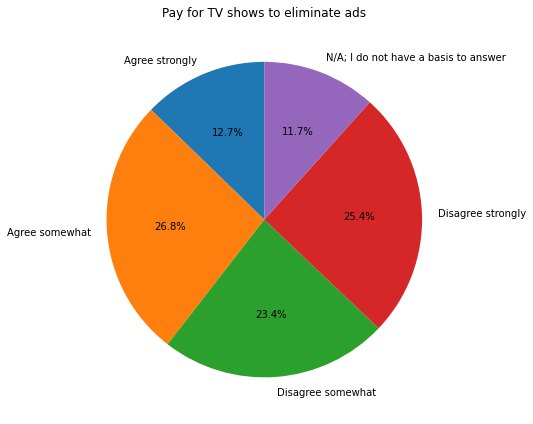

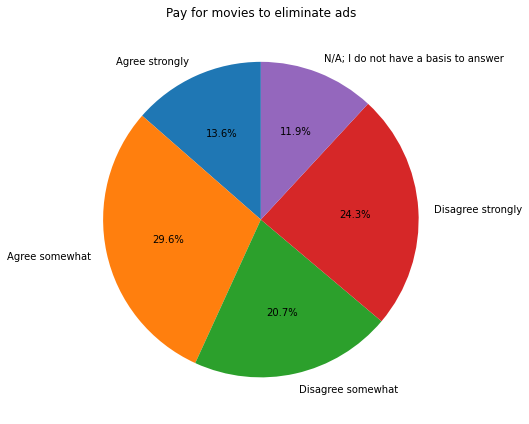

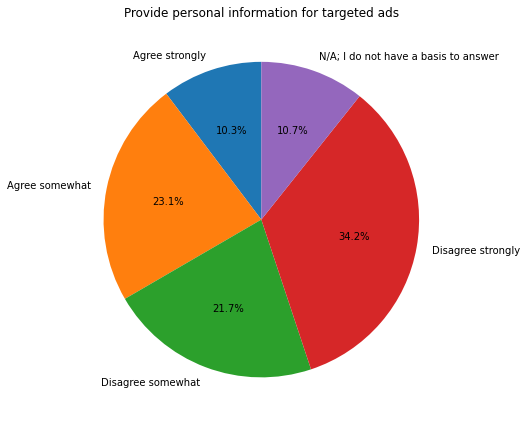

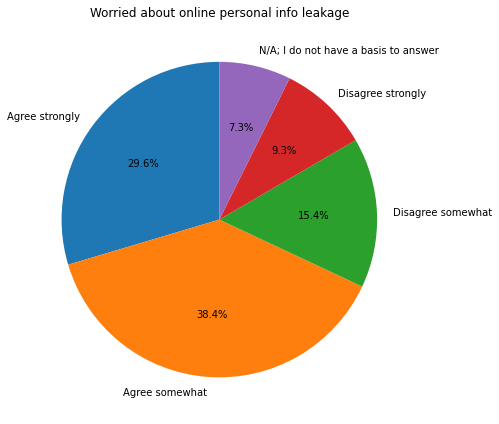

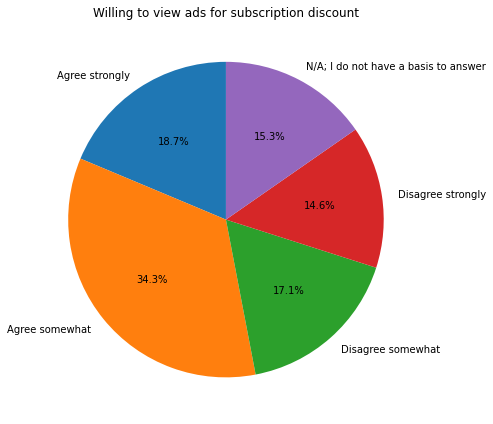

In [ ]:
for r in df_39.columns:
    #print(r)
    ratio_l = []
    for l in levels:
        ratio = df_39[r].value_counts()[l]/len(df_39)
        ratio_l.append(ratio)
        #print(l + ": "+str(round(ratio*100,2))+"%")
    plt.pie(np.array(ratio_l), labels = levels, startangle = 90, autopct='%1.1f%%')
    plt.title(r)
    plt.show() 
    print()

We chose to explore on the question "[Q39] Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose N/A.", because there are several statements related to people's attitudes towards online ads promotion. 

Among news, sports, games, music, TV shows and movies, more people are against the will to pay for sports to eliminate ads, which means there might be more ads exposures if promoting during sport games; for TV shows and movies, more people are willing to pay for eliminating ads. Over half of people surveyed agree to view ads for subscription discounts, combined with prior findings, we can associate this with movies and TV shows platforms to put up subscription discount associated with ads viewing, to promote ads exposure.

A large portion of surveyed people disagree strongly with providing personal information online, and a large portion (almost 70%) feel worried about online personal information leakage. We suspect that these 2 findings could be related in the way that the current phenomenon of personal info leakage have caused people's intrust and therefore the targeted ads would be harder to implement.

<a name ="Clustering-Model"></a>
## Clustering Model

1. [Data Preparation](#Data-Preparation)
2. [Select Best K](#Select-Best-K)
3. [Clustering Model](#Clustering-Model)
4. [Principal Component Analysis](#Principal-Component-Analysis)
5. [Cluster Analysis](#Cluster-Analysis)

<a name="Data-Preparation"></a>
#### **Data Preparation**


In [ ]:
user_info = ['age - you are...','Q4 - What is your gender?','region - Region','QNEW3 - What is your employment status?','QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?','Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.']

In [ ]:
Q8_columns = [x for x in df_3.columns if x[0:4] == 'Q8 -']
Q10_columns = [x for x in df_3.columns if 'Q10' in x]
columns_keep = user_info + Q8_columns + Q10_columns
df_final = df_3[columns_keep]
df_final = df_final.rename(columns={"age - you are...": "Age","Q4 - What is your gender?":"Gender","region - Region":"Region","QNEW3 - What is your employment status?":"Employment","QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?":"Child","Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.":"Income"})

In [ ]:
# income column, update the not relevant to median in the region
df_final['Income'].value_counts()

$50,000 to $99,999      755
Less than $29,999       488
$30,000 to $49,999      441
$100,000 to $299,999    328
Do not know             170
More than $300,000       23
Name: Income, dtype: int64

In [ ]:
df_final[df_final['Income'] == 'Do not know']['Employment'].value_counts()

Student                            106
Employed full-time or part-time     23
Unemployed                          21
Retired                             15
Self-employed                        5
Name: Employment, dtype: int64

In [ ]:
# check percentage of those with unknonwn income
df_final[df_final['Income'] == 'Do not know'].shape[0] / df_final.shape[0]

0.07709750566893424

In [ ]:
# students - what's the avg salary?
df_final[df_final['Employment'] == 'Student']['Income'].value_counts()

Do not know             106
Less than $29,999        87
$50,000 to $99,999       81
$30,000 to $49,999       52
$100,000 to $299,999     33
More than $300,000        3
Name: Income, dtype: int64

In [ ]:
# remove these from the df for now. Mostly student with no income - > might bring them back later
df_final = df_final[df_final['Income'] != 'Do not know']

In [ ]:
# check curr samples now
df_final.shape

(2035, 48)

In [ ]:
df_sample_final = df_final.copy()

df_sample_final.head()

,Age,Gender,Region,Employment,Child,Income,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,...,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know"
0,30-46,Female,Midwest,Unemployed,Yes,"$50,000 to $99,999",No,No,No,No,...,No,No,No,No,Yes,No,Yes,No,No,No
1,30-46,Female,South,Unemployed,Yes,"$30,000 to $49,999",Yes,Yes,No,No,...,No,No,No,No,No,No,No,No,No,No
2,47-65,Male,South,Retired,No,"$100,000 to $299,999",Yes,Yes,No,No,...,No,No,No,No,No,No,Yes,No,No,No
3,66 or older,Female,Northeast,Retired,No,"$50,000 to $99,999",Yes,No,Yes,Yes,...,No,No,No,No,No,No,No,No,Yes,No
4,47-65,Female,Midwest,Employed full-time or part-time,No,"$50,000 to $99,999",Yes,Yes,No,No,...,No,No,No,No,No,No,No,No,Yes,No


In [ ]:
# turn Q8 data into 1/0
Q8_options = [x.split('-')[2:] for x in Q8_columns]
Q8_options_full = [' '.join([row for row in x]) for x in Q8_options]
for col in df_final[Q8_columns]:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

In [ ]:
# turn Q10 data into 1/0
Q10_options = [x.split('-')[2:] for x in Q10_columns]
for col in df_final[Q10_columns]:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})
Q10_options_full = [' '.join([row for row in x]) for x in Q10_options]


**Income**

In [ ]:
df_final.Income.value_counts()

$50,000 to $99,999      755
Less than $29,999       488
$30,000 to $49,999      441
$100,000 to $299,999    328
More than $300,000       23
Name: Income, dtype: int64

In [ ]:
def assign_income(row):

    if row == 'Less than $29,999':

        result = 0

    elif row == '$30,000 to $49,999':

        result = 0

    elif row == '$50,000 to $99,999':

        result = 1

    elif row == '$100,000 to $299,999':

        result = 1

    else:

        result = 1

    return result

In [ ]:
df_final['Income'] = df_final['Income'].apply(assign_income)

df_final.Income.value_counts()

1    1106
0     929
Name: Income, dtype: int64

**Child**

In [ ]:
df_final.Child.value_counts()

No     1296
Yes     739
Name: Child, dtype: int64

In [ ]:
def assign_child(row):
    
    if row == 'No':
        
        result = 0
        
    else:
        result = 1
    
    return result

In [ ]:
df_final['Child'] = df_final['Child'].apply(assign_child)

df_final.Child.value_counts()

0    1296
1     739
Name: Child, dtype: int64

**Employment**

In [ ]:
df_final.Employment.value_counts()

Employed full-time or part-time    893
Retired                            424
Unemployed                         308
Student                            256
Self-employed                      154
Name: Employment, dtype: int64

'Employed full-time or part-time' & 'Self-employed' == 1, else == 0

In [ ]:
def assign_employ (row):
    if row == 'Employed full-time or part-time':
        
        result = 1
        
    elif row == 'Self-employed':
        
        result = 1
    
    elif row =='Retired':
        
        result = 0
    
    elif row == 'Unemployed':
        
        result = 0
    
    else:
        result = 0
    
    return result

In [ ]:
df_final['Employment'] = df_final['Employment'].apply(assign_employ)

df_final.Employment.value_counts()

1    1047
0     988
Name: Employment, dtype: int64

**Region**

In [ ]:
df_final.Region.value_counts()

South        715
West         477
Midwest      428
Northeast    415
Name: Region, dtype: int64

Ordinal Encoder

In [ ]:
def assign_region (row):
    if row == 'South':
        
        result = 1
        
    elif row =='West':
        
        result = 2
    
    elif row == 'Midwest':
        
        result = 3
        
    else:
        
        result = 4
    
    return result

In [ ]:
df_final['Region'] = df_final['Region'].apply(assign_region)
df_final.Region.value_counts()

1    715
2    477
3    428
4    415
Name: Region, dtype: int64

**Gender**

In [ ]:
df_final.Gender.value_counts()

Female    1022
Male      1013
Name: Gender, dtype: int64

In [ ]:
def assign_gender (row):
    
    if row == 'Female':
        
        result = 0
        
    else:
        
        result = 1
    
    return result

In [ ]:
df_final['Gender'] = df_final['Gender'].apply(assign_gender)

df_final.Gender.value_counts()

0    1022
1    1013
Name: Gender, dtype: int64

**Age**

In [ ]:
df_final.Age.value_counts()

30-46          435
47-65          431
24-29          423
66 or older    421
14-23          325
Name: Age, dtype: int64

In [ ]:
def assign_age(row):
        
        if row == '14-23':
            
            result = 1
            
        elif row == '24-29':
            
            result = 2
            
        elif row == '30-46':
            
            result = 3
        
        elif row =='47-65':
            
            result = 4
            
        else:
            result = 5
            
        return result

In [ ]:
df_final['Age'] = df_final['Age'].apply(assign_age)

df_final.Age.value_counts()

3    435
4    431
2    423
5    421
1    325
Name: Age, dtype: int64

In [ ]:
df_final.head()

,Age,Gender,Region,Employment,Child,Income,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,...,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know"
0,3,0,3,0,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,3,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,0,4,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,4,0,3,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


All input features we selected are people's demographics, their choice of home electronics and their willingness to purchase in 12 months, because these questions are able to help group these people based on their characteristics and their choices for home electronics.

<a name="Select-Best-K"></a>
#### **Select Best K**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 20305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 20305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 20305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 20305.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 682, cost: 17368.0
Run 1, iteration: 2/100, moves: 59, cost: 17368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 527, cost: 18346.0
Run 2, iteration: 2/1

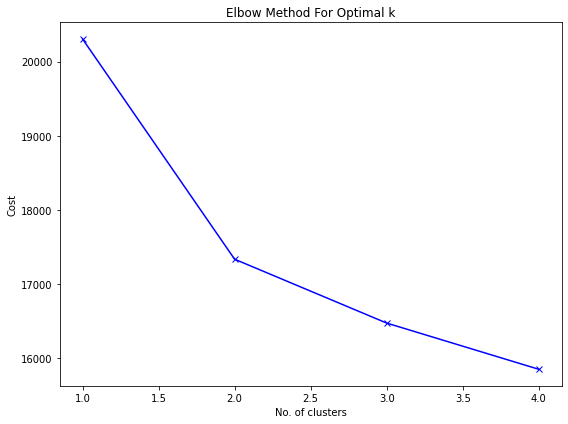

In [ ]:
# Elbow curve to find optimal K

plt.rcParams["figure.figsize"] = [8, 6]
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_final)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

<a name="Clustering-Model"></a>
#### **K-modes Clustering Model**

In [ ]:
# Building the model with 2 clusters
kmode = KModes(n_clusters = 2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_final)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 613, cost: 17793.0
Run 1, iteration: 2/100, moves: 194, cost: 17723.0
Run 1, iteration: 3/100, moves: 15, cost: 17723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 835, cost: 17478.0
Run 2, iteration: 2/100, moves: 1, cost: 17478.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 534, cost: 18207.0
Run 3, iteration: 2/100, moves: 3, cost: 18207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 533, cost: 17466.0
Run 4, iteration: 2/100, moves: 21, cost: 17466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 765, cost: 17550.0
Run 5, iteration: 2/100, moves: 207, cost: 17486.0
Run 5, iteration: 3/100, moves: 79, cost: 174

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

We selected K-modes clustering, because all the input features we selected are categorical variables. K-modes is an extension of K-means, but applicable for pure categorical data. Instead of distances, K-Modes calculates dissimilarities (quantification of the total mismatches between 2 objects). We hope to discover embedded groupings of customers through clustering learning.



<a name="Principal-Component-Analysis"></a>
#### **Principal Component Analysis**


In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_final)

In [ ]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [ ]:
pca = PCA(n_components = 2)
pca.fit(segmentation_std)
score_pca = pca.transform(segmentation_std)

In [ ]:
df_seg_pca_kmode = pd.concat([df_final.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df_seg_pca_kmode.columns.values[-2: ] = ['Component 1', 'Component 2']
df_seg_pca_kmode['Segment K-means PCA'] = kmode.labels_

In [ ]:
df_seg_pca_kmode.head()

,Age,Gender,Region,Employment,Child,Income,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,...,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know",Component 1,Component 2,Segment K-means PCA
0,3,0,3,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,2.653511,3.617000,1
1,3,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1.244813,-1.291922,1
2,4,1,1,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,1.543810,-1.338037,1
3,5,0,4,0,0,1,1,0,1,1,...,0,0,0,0,0,1,0,1.935158,-3.384156,1
4,4,0,3,1,0,1,1,1,0,0,...,0,0,0,0,0,1,0,-1.456892,-1.854017,1


In [ ]:
df_seg_pca_kmode['Segment'] = df_seg_pca_kmode['Segment K-means PCA'].map({0:'first', 1:'second'})

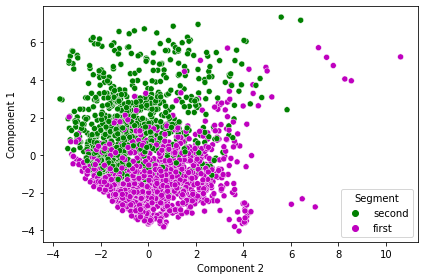

In [ ]:
x_axis = df_seg_pca_kmode['Component 2']
y_axis = df_seg_pca_kmode['Component 1']
plt.figure(figsize = (6, 4))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmode['Segment'], palette = ['g', 'm'])

After we found the optimal K = 2, we use K = 2 as our PCA components. The PCA scatter plot presents that the purple class (first component) is distinctive, but there is still some overlap with the green class (second component)

<a name="Cluster-Analysis"></a>
#### **Cluster Analysis**


In [ ]:
df_final.insert(0, "Cluster", clusters, True)

df_final.head()

,Cluster,Age,Gender,Region,Employment,Child,Income,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,...,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know"
0,1,3,0,3,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,3,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,5,0,4,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,4,0,3,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_sample_final.insert(0, "Cluster", clusters, True)
# attach cluster assignments to original dataset
df_sample_final.head()

,Cluster,Age,Gender,Region,Employment,Child,Income,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,...,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know"
0,1,30-46,Female,Midwest,Unemployed,Yes,"$50,000 to $99,999",No,No,No,...,No,No,No,No,Yes,No,Yes,No,No,No
1,1,30-46,Female,South,Unemployed,Yes,"$30,000 to $49,999",Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
2,1,47-65,Male,South,Retired,No,"$100,000 to $299,999",Yes,Yes,No,...,No,No,No,No,No,No,Yes,No,No,No
3,1,66 or older,Female,Northeast,Retired,No,"$50,000 to $99,999",Yes,No,Yes,...,No,No,No,No,No,No,No,No,Yes,No
4,1,47-65,Female,Midwest,Employed full-time or part-time,No,"$50,000 to $99,999",Yes,Yes,No,...,No,No,No,No,No,No,No,No,Yes,No


In [ ]:
kmode.cluster_centroids_

array([[5, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

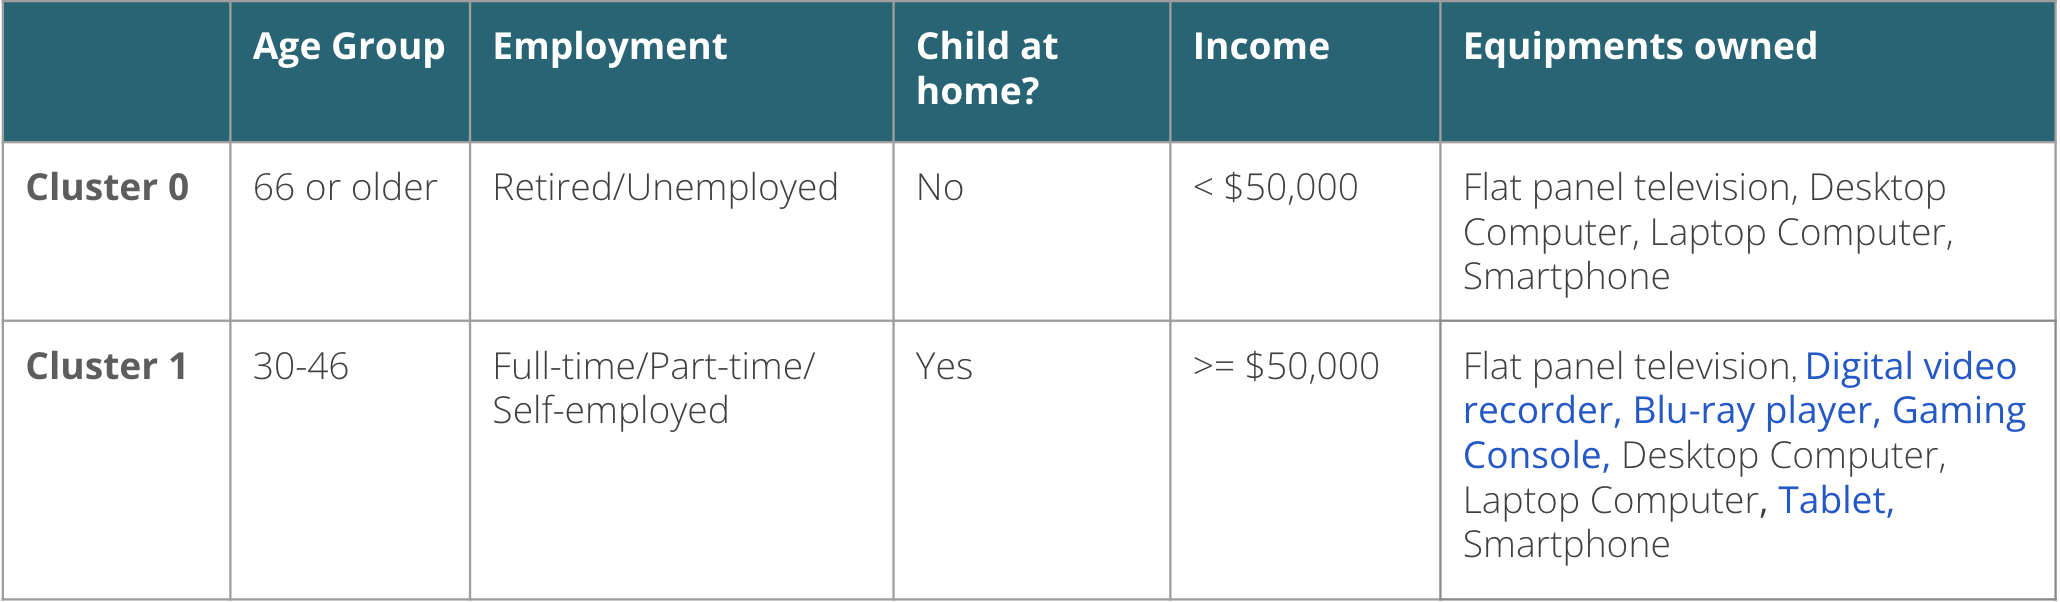

Corresponding to centroids, we extracted several key characteristics of these 2 clusters, and get a rough portrait for each group. 

Cluster 0: overall, age is older, most of them are not employed, do not have children at home, income is lower (<$50,000), the equipments they owned only for basic life needs. 

Cluster 1: overall, age is younder (middle-aged are more represented), employed, have children at home, income is higher (>=$50,000), the equipments they owned show a trend for home entertainments and lifestyle.

In [ ]:
# separate 2 clusters
df_sample_final_1 = df_sample_final[df_sample_final['Cluster'] == 1]
df_sample_final_0 = df_sample_final[df_sample_final['Cluster'] == 0]

In [ ]:
df_sample_final_1.shape

(872, 49)

In [ ]:
df_sample_final_0.shape

(1163, 49)

The number of people in each cluster is roughly the same.

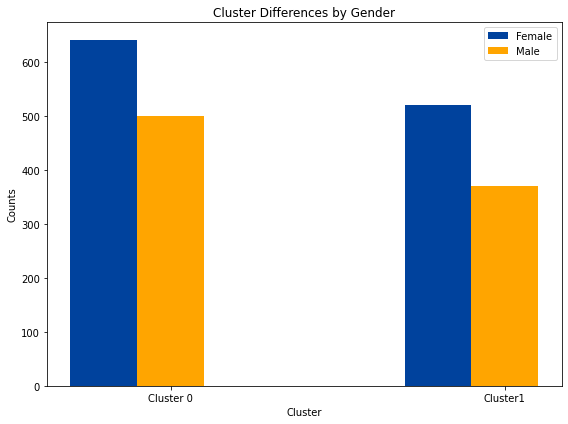

In [ ]:
x = np.arange(2)
y1 = [df_sample_final_0.Gender.value_counts()[0],df_sample_final_0.Gender.value_counts()[1]] #cluster 0
y2 = [df_sample_final_1.Gender.value_counts()[0],df_sample_final_1.Gender.value_counts()[1]]#cluster1
width = 0.2

plt.bar(x-0.2, y1, width, color='#00429d')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['Cluster 0','Cluster1'])
plt.xlabel("Cluster")
plt.ylabel("Counts")
plt.title('Cluster Differences by Gender')
plt.legend(["Female", "Male"])
plt.show()

Gender is about even, while females are slightly more in each cluster.

age group breakdown for each cluster:

In [ ]:
df_sample_final_1.Age.value_counts()

30-46          286
24-29          226
47-65          176
14-23          146
66 or older     38
Name: Age, dtype: int64

24-46 aged people are dominating, represeting people's choices catching up with trend and certain economic ability.

In [ ]:
df_sample_final_0.Age.value_counts()

66 or older    383
47-65          255
24-29          197
14-23          179
30-46          149
Name: Age, dtype: int64

People aged above 46 are dominating, showing their more conservative and practical choices with home electronics.

Income levels breakdown for each cluster:

In [ ]:
df_sample_final_1.Income.value_counts()

$50,000 to $99,999      429
$100,000 to $299,999    193
$30,000 to $49,999      138
Less than $29,999        98
More than $300,000       14
Name: Income, dtype: int64

In [ ]:
df_sample_final_0.Income.value_counts()

Less than $29,999       390
$50,000 to $99,999      326
$30,000 to $49,999      303
$100,000 to $299,999    135
More than $300,000        9
Name: Income, dtype: int64

Equipments owned for 2 clusters:

In [ ]:
#cluster 1
for i in range(0, len(Q8_options_full)):
  print(Q8_options_full[i] + ': ' + str((df_sample_final_1.iloc[:,i+7] == 'Yes').sum()))

Flat panel television: 673
Digital video recorder (DVR): 479
Streaming media box or over the top box: 255
Portable streaming thumb drive/fob: 198
Over the air digital TV antenna (for free access to network broadcast without pay TV subscription): 143
Blu ray disc player/DVD player: 661
Gaming console: 681
Portable video game player: 327
Computer network/router in your home for wireless computer/laptop usage: 636
Desktop computer: 598
Laptop computer: 776
Tablet: 687
Dedicated e book reader: 275
Smartphone: 766
Basic mobile phone (not a smartphone): 179
Smart watch: 125
Fitness band: 201
Virtual reality headset: 72
Drone: 42
None of the above: 0
Don't Know: 0


In [ ]:
#cluster 0
for i in range(0, len(Q8_options_full)):
  print(Q8_options_full[i] + ': ' + str((df_sample_final_0.iloc[:,i+7] == 'Yes').sum()))

Flat panel television: 660
Digital video recorder (DVR): 221
Streaming media box or over the top box: 122
Portable streaming thumb drive/fob: 76
Over the air digital TV antenna (for free access to network broadcast without pay TV subscription): 134
Blu ray disc player/DVD player: 355
Gaming console: 321
Portable video game player: 142
Computer network/router in your home for wireless computer/laptop usage: 422
Desktop computer: 686
Laptop computer: 818
Tablet: 362
Dedicated e book reader: 154
Smartphone: 661
Basic mobile phone (not a smartphone): 373
Smart watch: 38
Fitness band: 97
Virtual reality headset: 19
Drone: 23
None of the above: 22
Don't Know: 0


Cluster 1 is more interested into home entertainments and modern technology, such as gaming console, Portable video game player, tablet, smart watch, fitness band, virtual reality headset.

Equipments to purchase in 12 months for 2 clusters:

In [ ]:
# cluster 1
for i in range(0, len(Q10_options_full)):
  print(Q10_options_full[i] + ': ' + str((df_sample_final_1.iloc[:,i+28] == 'Yes').sum()))

Flat panel television: 55
Digital video recorder (DVR): 64
Streaming media box or over the top box: 113
Portable streaming thumb drive/fob: 105
Over the air digital TV antenna (for free access to network broadcast without pay TV subscription): 64
Blu ray disc player/DVD player: 39
Gaming console: 32
Portable video game player: 72
Computer network/router in your home for wireless computer/laptop usage: 39
Desktop computer: 37
Laptop computer: 29
Tablet: 67
Dedicated e book reader: 93
Smartphone: 44
Basic mobile phone: 37
Smart watch: 187
Fitness band: 173
Virtual reality headset: 100
Drone: 99
None of the above: 268
Don't Know: 0


In [ ]:
# cluster 0
for i in range(0, len(Q10_options_full)):
  print(Q10_options_full[i] + ': ' + str((df_sample_final_0.iloc[:,i+28] == 'Yes').sum()))

Flat panel television: 98
Digital video recorder (DVR): 55
Streaming media box or over the top box: 62
Portable streaming thumb drive/fob: 42
Over the air digital TV antenna (for free access to network broadcast without pay TV subscription): 52
Blu ray disc player/DVD player: 61
Gaming console: 59
Portable video game player: 48
Computer network/router in your home for wireless computer/laptop usage: 57
Desktop computer: 50
Laptop computer: 67
Tablet: 148
Dedicated e book reader: 56
Smartphone: 89
Basic mobile phone: 36
Smart watch: 92
Fitness band: 98
Virtual reality headset: 50
Drone: 44
None of the above: 535
Don't Know: 0


Both clusters show considerable interests in smart watch and fitness band, which could indicate a trend for scientific and healthy life. Besides that, Cluster 1 shows strong interests in highly techinical devices such as VR headsets and drones, while Cluster 0 is more interested in practical sides: tablet and smartphone got high votes. And also, about half of Cluster 0 voted nothing to purchase, while only about a quarter of Cluster 1 voted nothing to purchase. Cluster 1 shows more willingness in home electronics and more purchase power. 

In [ ]:
# Top 5 different products on ownership for 2 clusters

In [ ]:
Q8_names = []
Q8_sum_group_0 = []
Q8_sum_group_1 = []

for col in Q8_columns:
  # print('Data for ', col)
  # print(df_final.groupby('Cluster')[col].sum())
  equip_name = col.split('-')[2:]
  equip_name_full = ' '.join([row for row in equip_name])
  Q8_names.append(equip_name_full)
  Q8_sum_group_0.append(df_final.groupby('Cluster')[col].sum()[0])
  Q8_sum_group_1.append(df_final.groupby('Cluster')[col].sum()[1])

In [ ]:
Q8_df = pd.DataFrame({'Equipment':Q8_names, 'Cluster0':Q8_sum_group_0, 'Cluster1':Q8_sum_group_1})

In [ ]:
Q8_df['diff'] = abs(Q8_df['Cluster1'] - Q8_df['Cluster0'])

In [ ]:
Q8_top5_diff = Q8_df.sort_values(by = 'diff',ascending=False).head(5)

In [ ]:
Q8_top5_diff

,Equipment,Cluster0,Cluster1,diff
6,Gaming console,321,681,360
11,Tablet,362,687,325
5,Blu ray disc player/DVD player,355,661,306
1,Digital video recorder (DVR),221,479,258
8,Computer network/router in your home for wirel...,422,636,214


Looks like Cluster 0 and 1 differ most into the above 5 categories

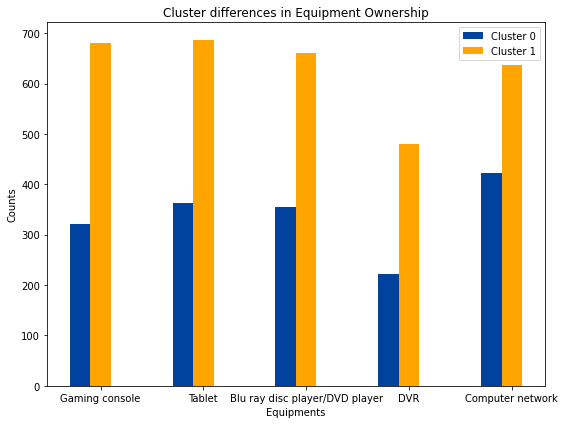

In [ ]:

x = np.arange(5)
y1 = Q8_top5_diff.iloc[:, 1].tolist() #cluster 0
y2 = Q8_top5_diff.iloc[:, 2].tolist() #cluster1
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='#00429d')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['Gaming console', 'Tablet', 'Blu ray disc player/DVD player', 'DVR', 'Computer network'])
plt.xlabel("Equipments")
plt.ylabel("Counts")
plt.title('Cluster differences in Equipment Ownership')
plt.legend(["Cluster 0", "Cluster 1"])
plt.show()

These 5 products are the 5 most different products that Cluster 1 owns than Cluster 0 owns. We can see that most of them are home entertainments, which are owned more by Cluster 1.

In [ ]:
# Top 5 different products on purchase intentions in 12 months for 2 clusters

In [ ]:
Q10_names = []
Q10_sum_group_0 = []
Q10_sum_group_1 = []

for col in Q10_columns:
  # print('Data for ', col)
  # print(df_final.groupby('Cluster')[col].sum())
  equip_name = col.split('-')[2:]
  equip_name_full = ' '.join([row for row in equip_name])
  Q10_names.append(equip_name_full)
  Q10_sum_group_0.append(df_final.groupby('Cluster')[col].sum()[0])
  Q10_sum_group_1.append(df_final.groupby('Cluster')[col].sum()[1])

In [ ]:
Q10_df = pd.DataFrame({'Equipment':Q10_names, 'Cluster0':Q10_sum_group_0, 'Cluster1':Q10_sum_group_1})
Q10_df['diff'] = abs(Q10_df['Cluster1'] - Q10_df['Cluster0'])
Q10_df = Q10_df[Q10_df['Equipment'] != 'None of the above']
Q10_top5_diff = Q10_df.sort_values(by = 'diff',ascending=False).head(5)

In [ ]:
# Looks cluster 1 and cluster 0 differ in intend purchase products in these 5 products
Q10_top5_diff

,Equipment,Cluster0,Cluster1,diff
15,Smart watch,92,187,95
11,Tablet,148,67,81
16,Fitness band,98,173,75
3,Portable streaming thumb drive/fob,42,105,63
18,Drone,44,99,55


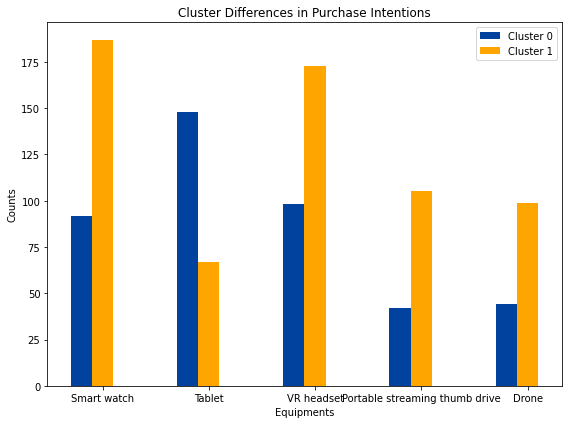

In [ ]:

x = np.arange(5)
y1 = Q10_top5_diff.iloc[:, 1].tolist() #cluster 0
y2 = Q10_top5_diff.iloc[:, 2].tolist() #cluster1
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='#00429d')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['Smart watch','Tablet','VR headset','Portable streaming thumb drive','Drone'])
plt.xlabel("Equipments")
plt.ylabel("Counts")
plt.title('Cluster Differences in Purchase Intentions')
plt.legend(["Cluster 0", "Cluster 1"])
plt.show()

Cluster 0 has more willingness to purchase Tablet comparing to cluster 1.
For Smart Watch, VR headset, Portable streaming thumb drive, and Drone, Cluster 1 will be the ideal target group.


In [ ]:
# check fav apps to use in each cluster
df_combine = df_combine[df_combine['Income'] != 'Do not know']

In [ ]:
df_combine.insert(0, "Cluster", clusters, True)

In [ ]:
tmp = df_combine.groupby('Cluster').sum().reset_index()

In [ ]:
tmp["Top Five Apps"] = tmp.iloc[:, 1:].apply(lambda row: getTopFive(row, tmp.columns[1:]), axis=1)

In [ ]:
tmp['Top Five Apps'][0] # Cluster 0

Index(['Social networks', 'Weather', 'Browser', 'Streaming music',
       'Navigation'],
      dtype='object')

In [ ]:
tmp['Top Five Apps'][1] # cluster 1

Index(['Social networks', 'Weather', 'Games', 'Browser', 'Streaming music'], dtype='object')

2 clusters shows surprisingly high consistency on favorite apps to use.

In [ ]:
# check favorite activities
valid_col_names_37.append('Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.')

In [ ]:
value_col_df_37 = df_1.loc[:, df_1.columns.isin(valid_col_names_37)]

In [ ]:
df_37 = value_col_df_37.dropna(thresh=2)

In [ ]:
Q37_col_names = ['Income','Attending live performances', 'Going to the movies', 'Watching television', 
                'Listening to music', 'Reading books', 'Reading magazines', 'Reading newspapers', 
               'Listening to the radio', 'Playing video games', 'Using the Internet for social or personal interests']


In [ ]:
df_37.columns = Q37_col_names

In [ ]:
df_37 = df_37[df_37['Income'] != 'Do not know']


In [ ]:
df_37.insert(0, "Cluster", clusters, True)

In [ ]:
df_37_group_0 = df_37[df_37['Cluster'] == 0]
df_37_group_1 = df_37[df_37['Cluster'] == 1]

In [ ]:
df_37_group_0 = df_37_group_0.drop(columns=['Income','Cluster'])
df_37_group_1 = df_37_group_1.drop(columns=['Income','Cluster'])

In [ ]:
df_37_counts_0 = df_37_group_0.apply(pd.value_counts)
df_37_counts_1 = df_37_group_1.apply(pd.value_counts)

In [ ]:
cluster_0_counts = (df_37_counts_0.loc[1.0]).values
cluster_1_counts = (df_37_counts_1.loc[1.0]).values

In [ ]:
Q37_index = ((df_37_counts_0.loc[1.0]).index).tolist()

In [ ]:
Q37_index

['Attending live performances',
 'Going to the movies',
 'Watching television',
 'Listening to music',
 'Reading books',
 'Reading magazines',
 'Reading newspapers',
 'Listening to the radio',
 'Playing video games',
 'Using the Internet for social or personal interests']

In [ ]:
Q37_final_counts = pd.DataFrame(cluster_0_counts, index=Q37_index)

In [ ]:
Q37_final_counts.columns = ['Cluster_0']


In [ ]:
Q37_final_counts['Cluster_1'] = cluster_1_counts

In [ ]:
Q37_final_counts

,Cluster_0,Cluster_1
Attending live performances,65,72
Going to the movies,97,89
Watching television,311,223
Listening to music,92,79
Reading books,115,72
Reading magazines,13,15
Reading newspapers,59,18
Listening to the radio,40,25
Playing video games,90,81
Using the Internet for social or personal interests,281,198


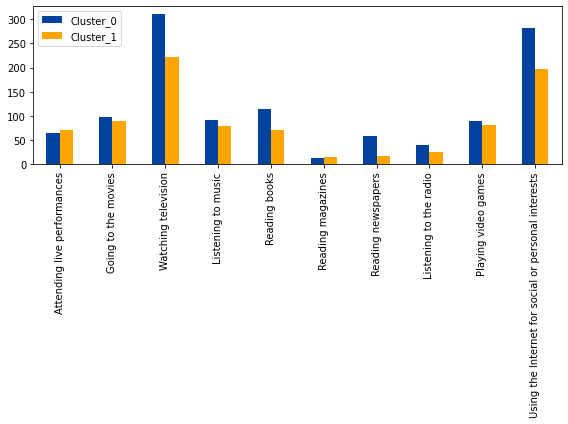

In [ ]:
colors = ['#00429d','orange']
fig, ax = plt.subplots()
Q37_final_counts.plot.bar(color=colors, ax=ax)


Both clusters rated watching television and using the Internet as top 2 favorite activities. Despite of these 2, we are interested in these 2 cluster's difference: 
Cluster 0 prefer reading books, listening to music/radio, reading newspapers.
Cluster 1 prefer playing video games, going to the movies, and attending live performances. So, news and music could be more emphasized media channel to reach Cluster 0; games and movies could be more emphasized media channel to reach Cluster 1.


Continued to previous findings, we can look into each cluster's attitudes towards ads on these emphasized media channels.

In [ ]:
df_3_copy = df_3[df_3['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'] != 'Do not know']

In [ ]:
df_3_copy.insert(0, "Cluster", clusters, True)
df_3_copy2 = df_3_copy[Q39_cols_orig]
df_3_copy2.columns = ['Pay for news to eliminate ads', 'Pay for sports info to eliminate ads', 'Pay for games to eliminate ads', 'Pay for music to eliminate ads', 'Pay for TV shows to eliminate ads', 'Pay for movies to eliminate ads', 'Provide personal information for targeted ads', 'Worried about online personal info leakage', 'Willing to view ads for subscription discount']

In [ ]:
df_3_copy2.insert(0, "Cluster", clusters, True)

In [ ]:
df_3_copy2_1 = df_3_copy2[df_3_copy2['Cluster'] == 1]
df_3_copy2_0 = df_3_copy2[df_3_copy2['Cluster'] == 0]

Cluster 1:

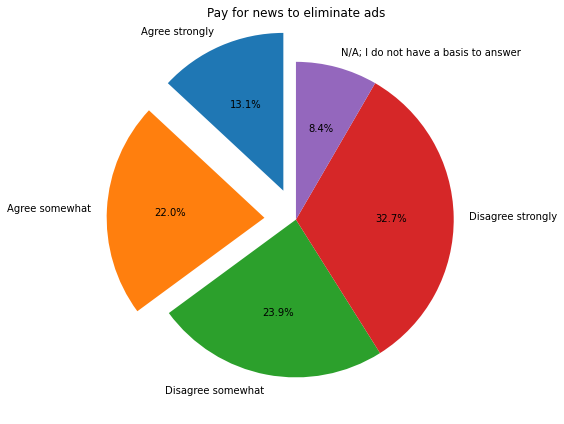

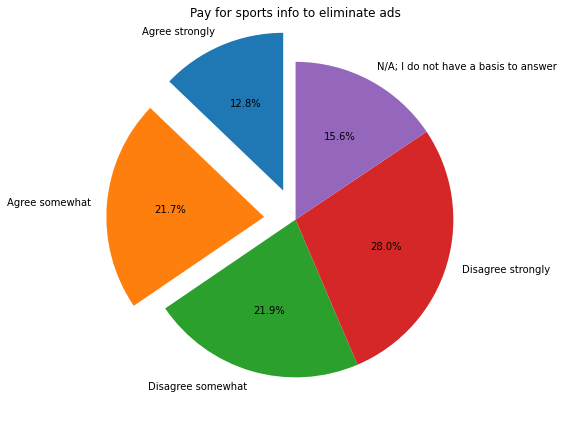

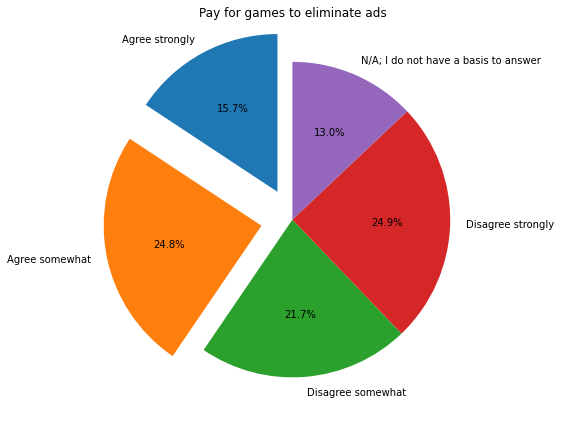

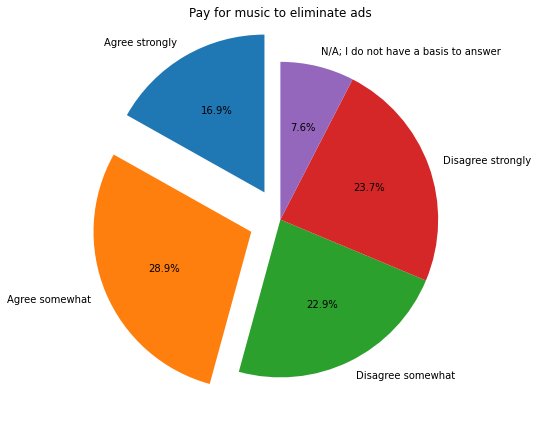

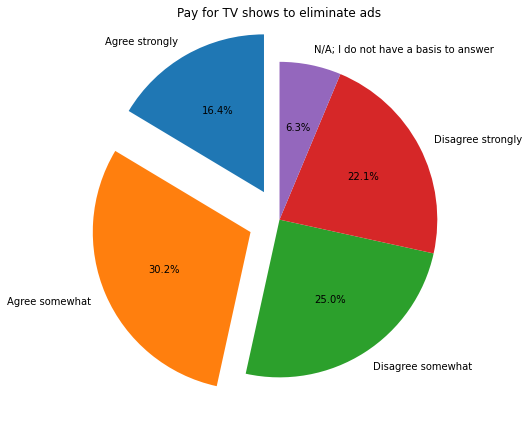

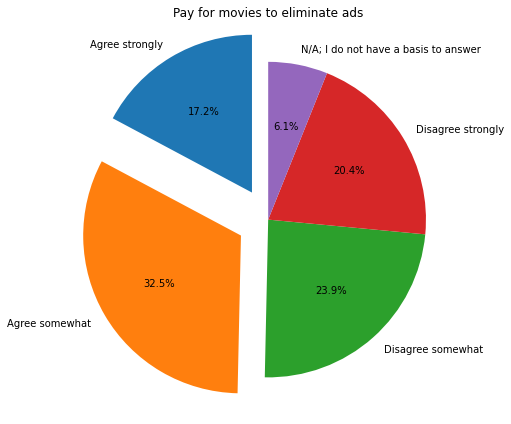

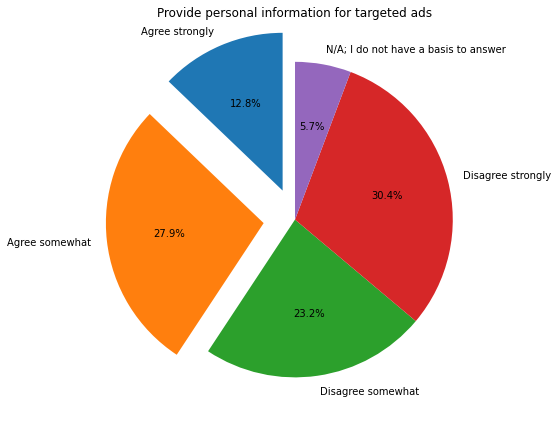

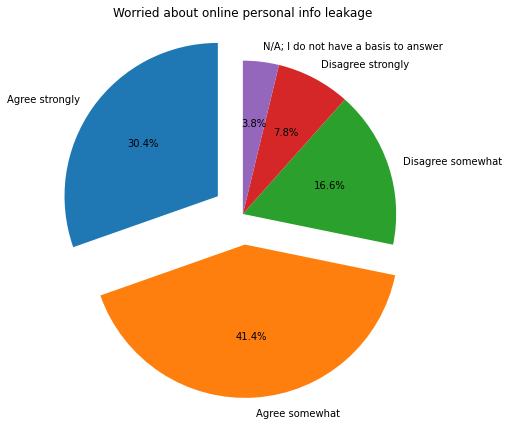

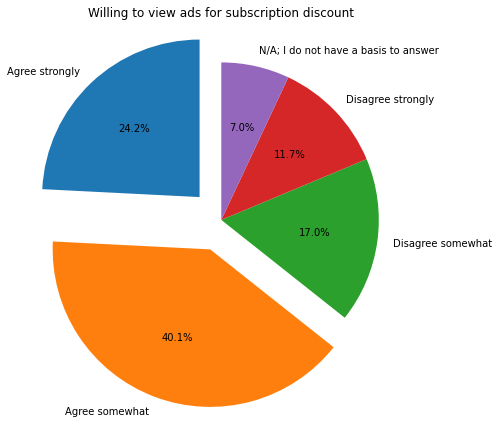

In [ ]:
for r in df_3_copy2_1.columns[1:]:
    #print(r)
    ratio_l = []
    for l in levels:
        ratio = df_3_copy2_1[r].value_counts()[l]/len(df_3_copy2_1)
        ratio_l.append(ratio)
        #print(l + ": "+str(round(ratio*100,2))+"%")
    plt.pie(np.array(ratio_l), labels = levels, startangle = 90, autopct='%1.1f%%', explode = [0.2,0.2,0,0,0])
    plt.title(r)
    plt.show() 
    print()

Cluster 0:

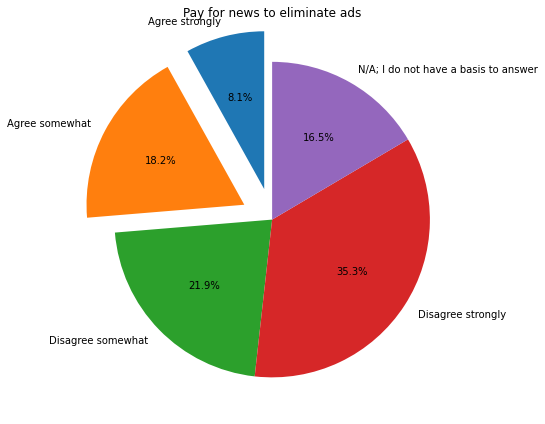

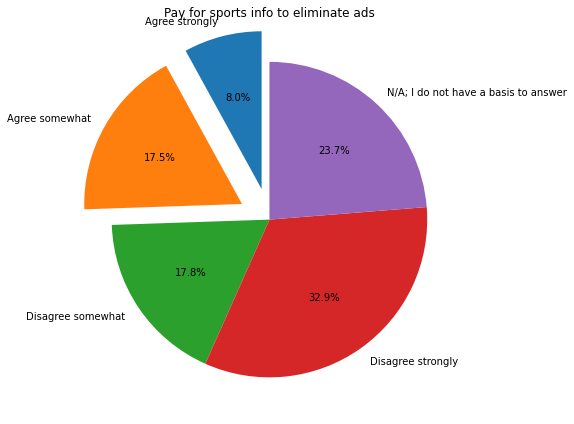

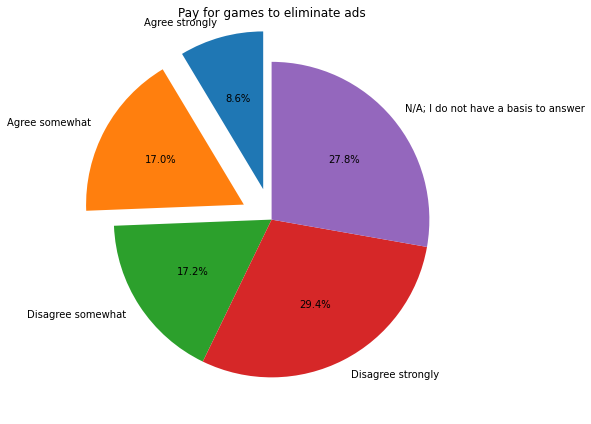

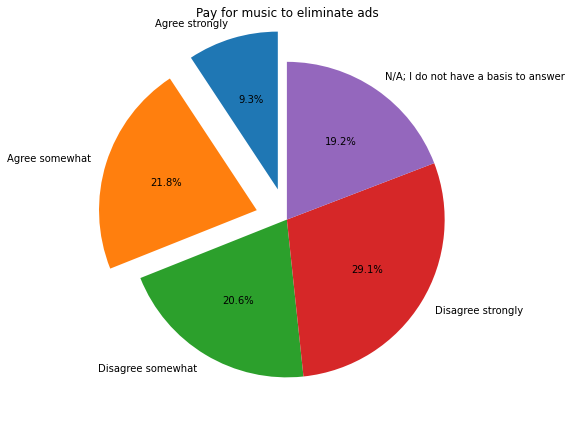

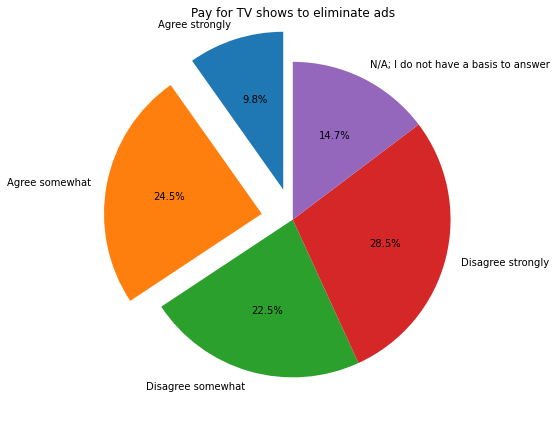

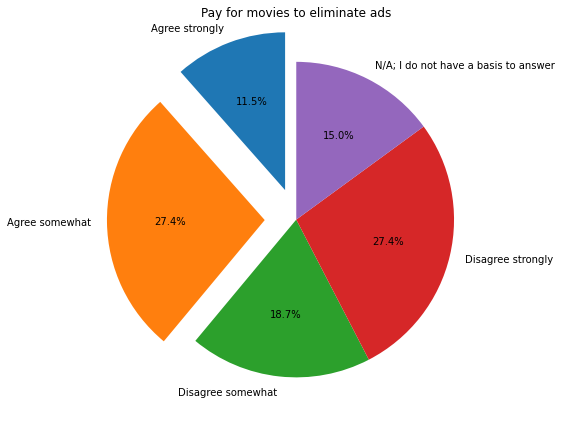

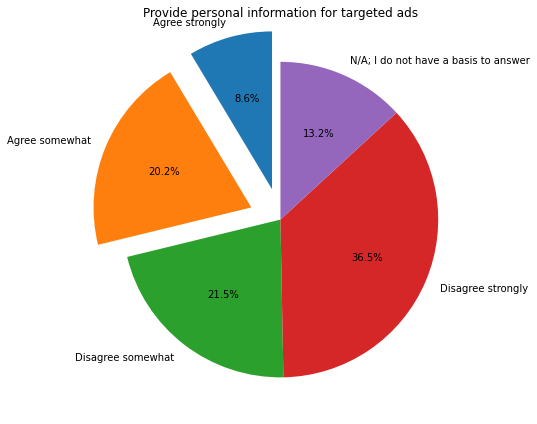

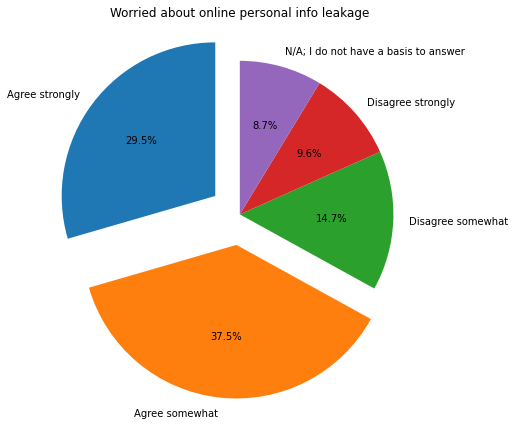

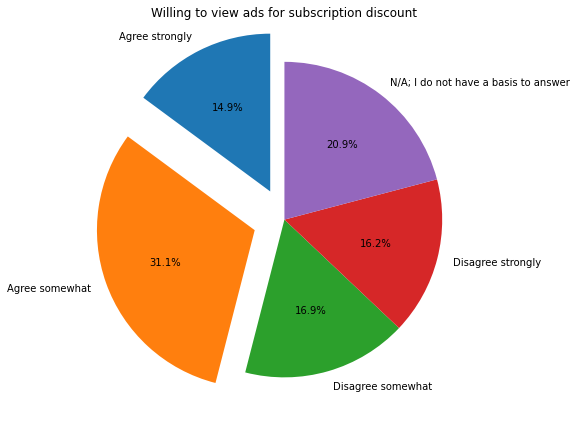

In [ ]:
for r in df_3_copy2_0.columns[1:]:
    #print(r)
    ratio_l = []
    for l in levels:
        ratio = df_3_copy2_0[r].value_counts()[l]/len(df_3_copy2_0)
        ratio_l.append(ratio)
        #print(l + ": "+str(round(ratio*100,2))+"%")
    plt.pie(np.array(ratio_l), labels = levels, startangle = 90, autopct='%1.1f%%', explode = [0.2,0.2,0,0,0])
    plt.title(r)
    plt.show() 
    print()

For Clsuter 0:
About 25% of Cluster 0 would pay for news to eliminate ads;
About 30% of Cluster 0 would pay for music to eliminate ads, indicating that these 2 media platforms can be expected for considerable ads exposure and conversion rate if being promoted on.

For Cluster 1: 
more than 50% of Cluster 1 would pay for movies to eliminate ads; more than 40% of Cluster 1 would pay for games to eliminate ads, indicating that promoting through these 2 media platforms should be carefully evaluated on channel cost and conversion.

Generally, Cluster 1 is more willing to view ads for subscription discounts, while Clsuter 0 is more conservative. The reason could be that Cluster 0 inherently purchase fewer subscriptions and also they feel more uncomfortable with watching ads online.

Generally, Cluster 1 is okay with providing personal information for targeted ads, while Cluster 0 is not, and actually a large portion of them (about 40%) disagree stongly with this statement. The potential reason could be the sense of security and online protection, since they also shows strong worries about online data leakage.

<a name ="Results-and-Recommendations"></a>
## Results and Recommendations


For users who belong to **Cluster 0**, we would like to target them with traditional marketing channels. This includes TV, Social media Apps, music, news/books. Based on results from earlier session, these users are more likely to purchase Tablets in 12 months. They will be the most ideal group to target if company is launching new Tablet products. Regarding the specific methods, they are less likely to view ads for subscription discounts, or provide personal information for targeted ads. With such consideration, companies might not offer speific disctouns or waste money trying to get personal information from these customers. Rather, companies can focus on spreading new product information through mouth-of-mouth, or referral method.

Users who belong to **Cluster 1** tend to be younger, and should be targeted with new marketing chnanels like games and movies. The main challenge with these new channels would be higher advertisement costs.  As a consequence, companies should watch out and closely monitor conversion rate andchannel cost, to ensure the budget is well-spent.
Users in Cluster 1 are also more likely to purchase Smart Watch, VR headset, Portable streaming thumb drive and Drone in 12 months than Cluster 0. If companies are launching these new products, customers in this group would love to receive any subscription discotouns from viewing advertisements, according to the survey. They are also more willing to provide personal information for targeted ads.

Overall, we notice a general trend of paying attention to having a **healthy life** from all users, regardless of which cluster they are in. Based on the numbers, it might seem like that Cluster 1 is more interested in smart watch and fitness brand, users in Cluster 0 also indicate some level of interested to those products. This might be an indication that smart devices might be getting more popular, and would become a potential opportunity of significant growth.

As for the next steps, we propose the following suggestions in temrs of data quality, data quantity, and business perspective in order to get a better customer segmentation. 


*   Companies should analyze **purchase power and broadcasting channel cost** for each of the user groups. Based on the clustering model results, we hypothesize that it might take extra cost to reach customers in Cluster 1, since they would be better targetted with new channels like games and movies. 
*   In order to provide a detail segmentation analysis, we might need additional details on **social network channels**. In the data that has been collected, even a majority of users select Social Apps as their favoriate app, there is no details in what platforms they used on daily basis. Without this detail, it would be difficult to driver richer insight, and to plan efficient marketing compaigns.
*   On the business perspective, we recommend that companies launch new products using a **canary approach**. This is a technique to reduce risk of introducing new version of products, by slowly rolling out the new product with the original version as a back-up. This ensures that companies do not lose out potential customers who prefer using the original product.
*   An effective **data flywheel effect** might be able to increase the company's revenue. The data flywheel effect refers to the process where as more users area adapting to the services or products, it feeds in more data, provides an opportunity to gain richer insight on user experiences, and ultimately makes the learning algorithm smarter to provide better product. Companies should consider collecting telemetry data to create an user feedback, as a starting point to create data flywheel effect with their products.
*   Companies need to consider **data privacy** when collecting these survey data and telemetry data from customers. These are sensitive user information, including user's age, income, region etc. Companies should keep track of people who have access to these information and manage to disclose information only to those needed.


With these information, we are hoping to reduce the marketing cost, and launch more efficient marketing compaigns to increase return-on-investment for home electronic equipment companies. 

## Team Contribution


*   Connie He: EDA Visualization, Data Preparation, Model Interpretation 
*   Liang Li: EDA Visualization and Analysis, Model Results Visualization and Analysis
*   Yu-Chih (Wisdom) Chen: EDA Visualization, Data Cleaning, Model Development




